Total points for this HW: 10

Make sure that you run all your codes and that all results are printed.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

## Question 1 (15%) 

### This task is to be done with manual calculations rather than using Python.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

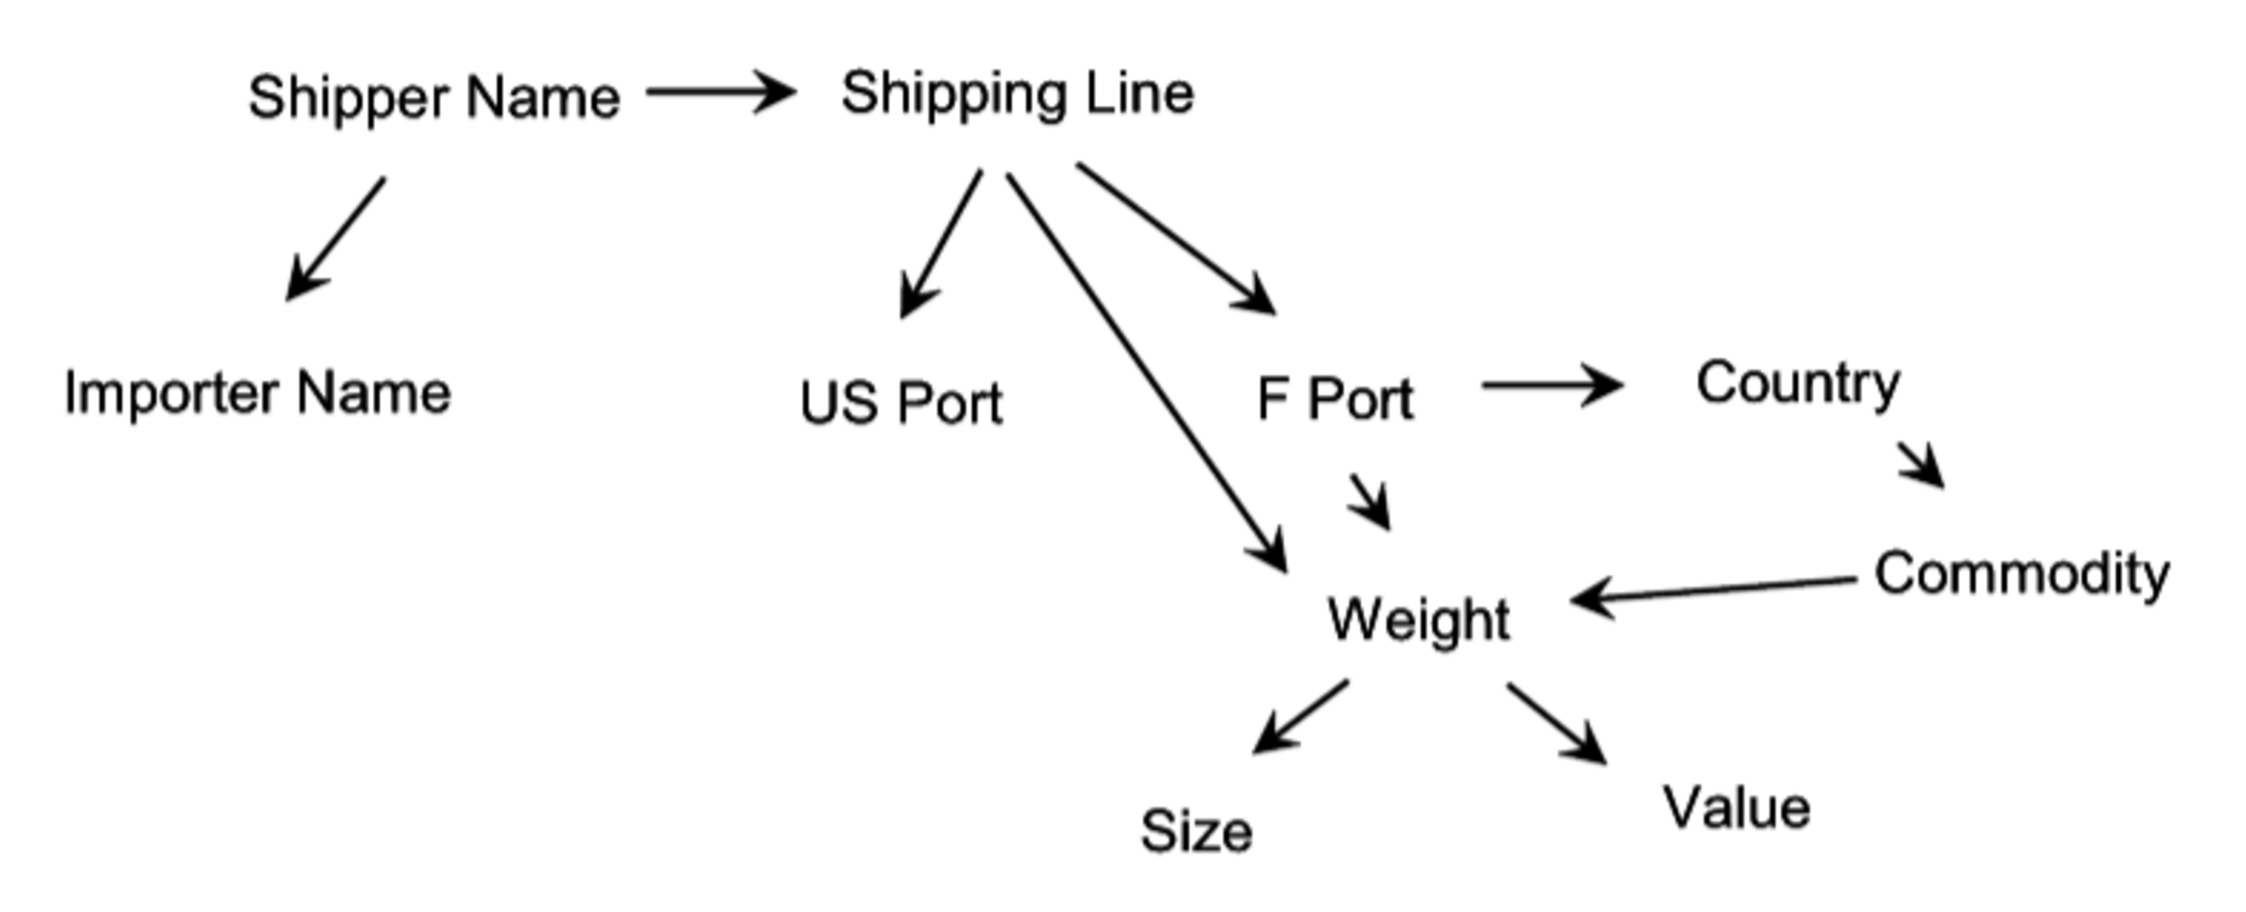

In [2]:
Image('HW3Q1.png')

### 1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6%):

CI (Shipper Name, Value | F Port)?   Dependent

CI (Shipper Name, Value | Shipping Line)?  Independent

CI (Foreign Port, Commodity | Country)?  Dependent

CI (Foreign Port, Commodity | County, Weight)?  Independent

### 2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (80%), ASCO (20%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (20%), Los Angeles (80%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (30%), Medium (20%), Heavy (50%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (60%), Heavy (30%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (15%), Medium (15%), Heavy (70%)

Which of the following packages is most anomalous?

Answer: B

a) A light package shipped from Vancouver to Seattle by ASCO (0.03)

b) A medium package shipped from Vancouver to Seattle by CSCO (0.0192)

c) A heavy package shipped from Yokohama to Los Angeles by CSCO (0.0768)

### To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9%)

(Your answers here, including all calculations)

For package P1: A light package shipped from Yokohama to Seattle by CSCO, P(P1) = 0.8 * 0.4 * 0.2 * 0.1 = 0.0064

For package P2: A medium package shipped from Yokohama to Seattle by CSCO, P(P2) = 0.8 * 0.4 * 0.2 * 0.6 = 0.0384

For package P3: A heavy package shipped from Yokohama to Seattle by CSCO, P(P3) = 0.8 * 0.4 * 0.2 * 0.3 = 0.0192

For package P4: A light package shipped from Yokohama to Los Angeles by CSCO, P(P4) = 0.8 * 0.4 * 0.8 * 0.1 = 0.0256

For package P5: A medium package shipped from Yokohama to Los Angeles by CSCO, P(P5) = 0.8 * 0.4 * 0.8 * 0.6 = 0.1536

For package P6: A heavy package shipped from Yokohama to Los Angeles by CSCO, P(P6) = 0.8 * 0.4 * 0.8 * 0.3 = 0.0768

For package P7: A light package shipped from Vancouver to Seattle by CSCO, P(P7) = 0.8 * 0.6 * 0.2 * 0.3 = 0.0288

For package P8: A medium package shipped from Vancouver to Seattle by CSCO, P(P8) = 0.8 * 0.6 * 0.2 * 0.2 = 0.0192

For package P9: A heavy package shipped from Vancouver to Seattle by CSCO, P(P9) = 0.8 * 0.6 * 0.2 * 0.5 = 0.048

For package P10: A light package shipped from Vancouver to Los Angeles by CSCO, P(P10) = 0.8 * 0.6 * 0.8 * 0.3 = 0.1152  

For package P11: A medium package shipped from Vancouver to Los Angeles by CSCO, P(P11) = 0.8 * 0.6 * 0.8 * 0.2 = 0.0768

For package P12: A heavy package shipped from Vancouver to Los Angeles by CSCO, P(P12) = 0.8 * 0.6 * 0.8 * 0.5 = 0.192

For package P13: A light package shipped from Vancouver to Seattle by ASCO, P(P13) = 0.2 * 1 * 1 * 0.15 = 0.03

For package P14: A light package shipped from Vancouver to Seattle by ASCO, P(P14) = 0.2 * 1 * 1 * 0.15 = 0.03

For package P15: A light package shipped from Vancouver to Seattle by ASCO, P(P15) = 0.2 * 1 * 1 * 0.7 = 0.14

## Question 2. Bayesian Network Learning (35%)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

A  B  C  D  E  F
0  1  0  0  0  1  1
1  0  0  0  1  0  1
2  1  1  0  1  1  1
3  1  0  0  1  1  1
4  2  0  1  0  1  1

### a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10%)

### b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15%)

### c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10%)   

In [4]:
# your answers here
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

In [5]:
#a)
hc = HillClimbSearch(train, BicScore(train))
best_model = hc.estimate()

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [6]:
print(best_model.edges())

[('A', 'D'), ('A', 'B'), ('A', 'E'), ('B', 'E'), ('D', 'B'), ('D', 'E')]


In [7]:
#b)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges())
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

CPD of B:
+------+--------+
| B(0) | 0.5015 |
+------+--------+
| B(1) | 0.4985 |
+------+--------+
CPD of A:
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| B    | B(0)                 | B(0)                  | ... | B(1)                  | B(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| D    | D(0)                 | D(0)                  | ... | D(1)                  | D(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| E    | E(0)                 | E(1)                  | ... | E(0)                  | E(1)                 |
+------+----------------------+-----------------------+-----+-----------------------+----------------------+
| A(0) | 0.4965893587994543   | 0.0013404825737265416 | ... | 0.517555266579974     | 0.001349527665317139 |
+------+----------

In [8]:
#c)
test_x = test.loc[:,['B','D','E']]
predicted_test = best_model.predict(test_x)
print("OS Accuracy:",(test.loc[:,'A'].reset_index(drop=True)==predicted_test['A']).mean())

  0%|          | 0/8 [00:00<?, ?it/s]

OS Accuracy: 0.5645


## Question 3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50%)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

#### a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5%)

#### b) Describe the three different hour-of-day trends represented by these three clusters (5%).

#### c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5%)  

#### d) Do the three clusters have different day-of-week trends? Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences. (5%)

#### e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5%)

#### f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5%)

#### g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20%)


In [9]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

crime_type Category   day_Sun   day_Mon  \
0                          ARSON: BY FIRE      P1P  0.138810  0.135977   
1     ASSAULT: AGG PO HANDS NO/MIN INJURY       P2  0.151852  0.118519   
2            ASSAULT: AGGRAVATED: HANDGUN      P1V  0.149912  0.139405   
3  ASSAULT: AGGRAVATED: OTHER DANG WEAPON      P1V  0.125000  0.139000   
4      ASSAULT: AGGRAVATED: OTHER FIREARM      P1V  0.156863  0.107843   

    day_Tue   day_Wed   day_Thu   day_Fri   day_Sat    hour_0  ...  \
0  0.155807  0.121813  0.130312  0.147309  0.169972  0.073654  ...   
1  0.162963  0.122222  0.129630  0.129630  0.185185  0.055556  ...   
2  0.141506  0.131349  0.136953  0.133100  0.167776  0.040630  ...   
3  0.148000  0.153000  0.133000  0.142000  0.160000  0.034000  ...   
4  0.166667  0.117647  0.147059  0.117647  0.186275  0.009804  ...   

   community_area_68  community_area_69  community_area_70  community_area_71  \
0           0.019830           0.016997           0.019830           0.022663   
1           0.037037           0.048148           0.018519           0.025926   
2           0.035377           0.031524           0.013310           0.042732   
3           0.028000           0.030000           0.014000           0.037000   
4           0.029412           0.019608           0.009804           0.019608   

   community_area_72  community_area_73  community_area_74  community_area_75  \
0           0.005666           0.000000           0.002833           0.005666   
1           0.003704           0.003704           0.003704           0.011111   
2           0.002102           0.017863           0.000000           0.012259   
3           0.003000           0.010000           0.002000           0.002000   
4           0.000000           0.000000           0.000000           0.009804   

   community_area_76  community_area_77  
0           0.000000           0.002833  
1           0.011111           0.007407  
2           0.002102           0.003152  
3           0.003000           0.006000  
4           0.000000           0.000000  

[5 rows x 110 columns]

In [10]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
0                      1         Rogers Park  1164399.219  1947666.815   
1                      2          West Ridge  1158307.200  1943243.722   
2                      3              Uptown  1168228.082  1930980.022   
3                      4      Lincoln Square  1159618.804  1933105.743   
4                      5        North Center  1161104.228  1924056.010   

   PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
0                         7.7                              23.6   
1                         7.8                              17.2   
2                         3.8                              24.0   
3                         3.4                              10.9   
4                         0.3                               7.5   

   PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
0                          8.7                                          18.2   
1                          8.8                                          20.8   
2                          8.9                                          11.8   
3                          8.2                                          13.4   
4                          5.2                                           4.5   

   PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
0                              27.5               23939   
1                              38.5               23040   
2                              22.2               35787   
3                              25.5               37524   
4                              26.2               57123   

   PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
0                        11.870556             3420  
1                         9.870385             3068  
2                         8.672137             3330  
3                         8.600422             1859  
4                        10.100636             1280

In [11]:
# your answers here
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
hour_data = data3.loc[:, 'hour_0':'hour_23']

scaler = StandardScaler()
hour_data_scaled = scaler.fit_transform(hour_data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(hour_data_scaled)
cluster_labels = kmeans.labels_

data3['cluster'] = cluster_labels

C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
#a)
cluster_means = data3.groupby('cluster').mean()
cluster_means_hour = pd.DataFrame(cluster_means, columns=[f'hour_{hour}' for hour in range(24)])

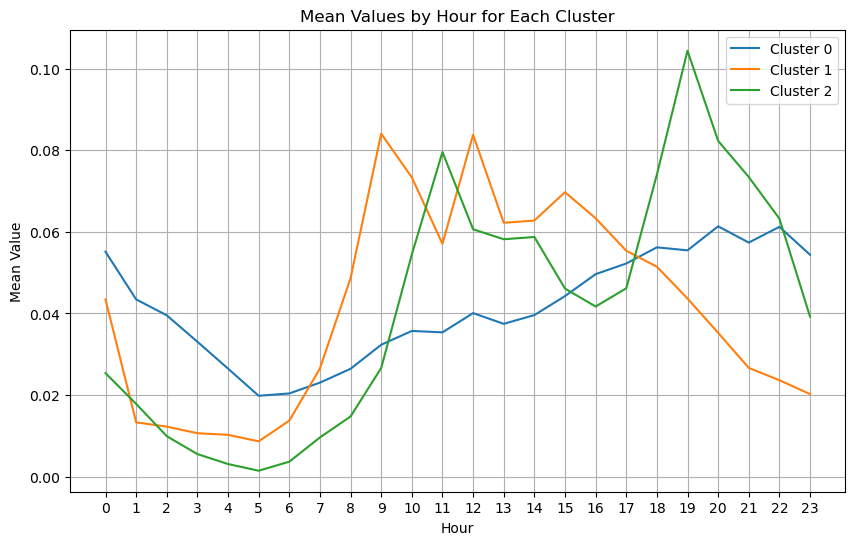

In [14]:
plt.figure(figsize=(10, 6))
for i in cluster_means_hour.index:
    plt.plot(list(range(24)),cluster_means_hour.loc[i], label=f'Cluster {i}')

plt.xlabel('Hour')
plt.ylabel('Mean Value')
plt.title('Mean Values by Hour for Each Cluster')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#b)
print('For cluster 0: The trend of it is the most stable among the three trends, generally this cluster of crime types is common whole day especially in the evening but less in the early morning.')
print('For cluster 1: The trend of it respresents some crime types which mainly occur during the daytime.')
print('For cluster 2: The trend of it respresents some crime types which mainly occur in the early evening and the noon.')

For cluster 0: The trend of it is the most stable among the three trends, generally this cluster of crime types is common whole day especially in the evening but less in the early morning.
For cluster 1: The trend of it respresents some crime types which mainly occur during the daytime.
For cluster 2: The trend of it respresents some crime types which mainly occur in the early evening and the noon.


C:\Users\14367\AppData\Local\Temp\ipykernel_21208\3825494333.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


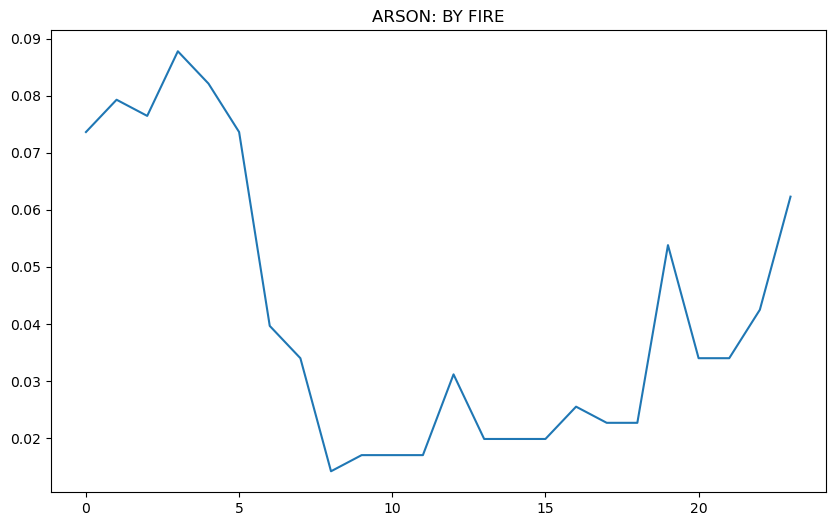

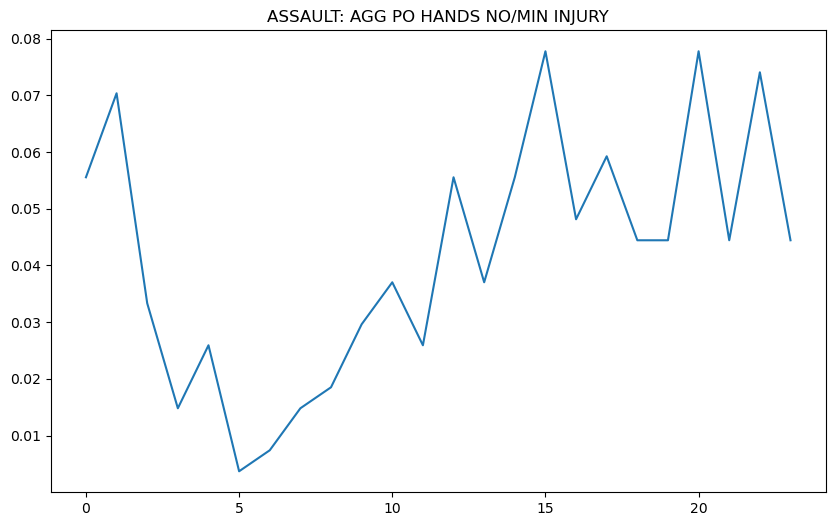

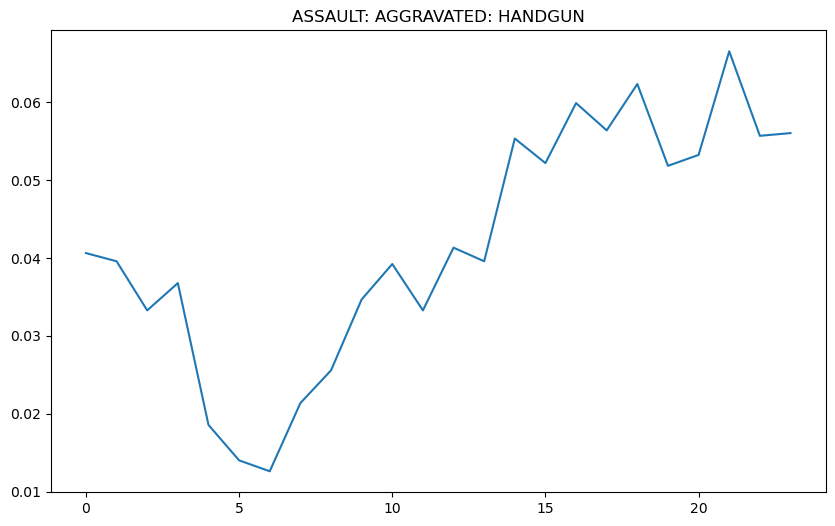

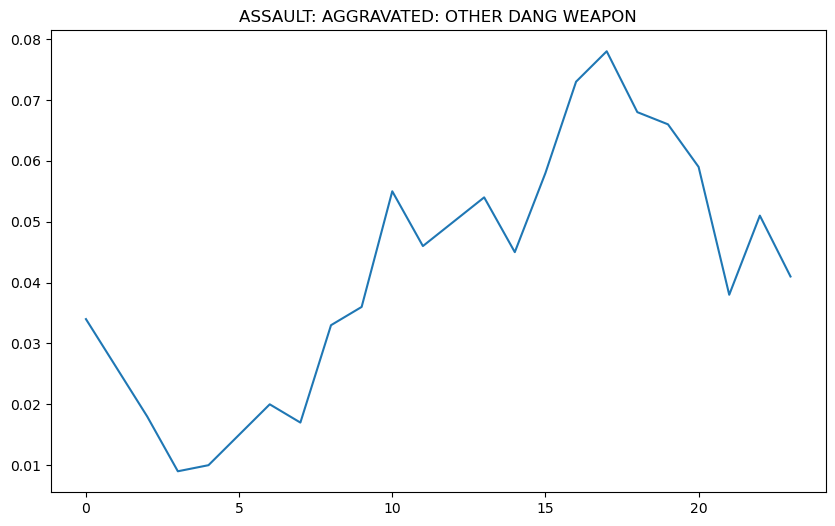

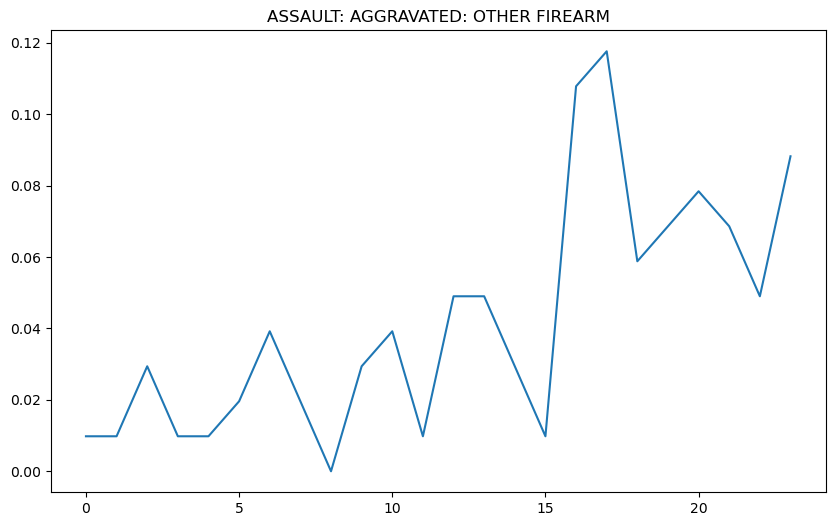

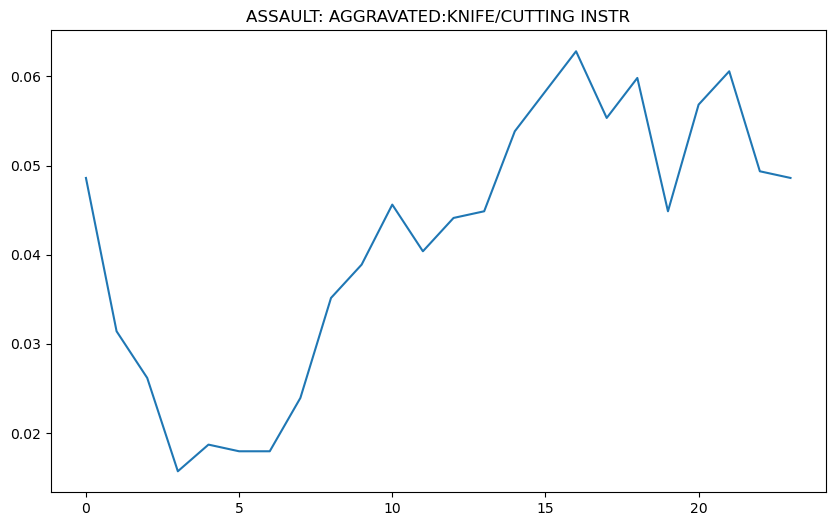

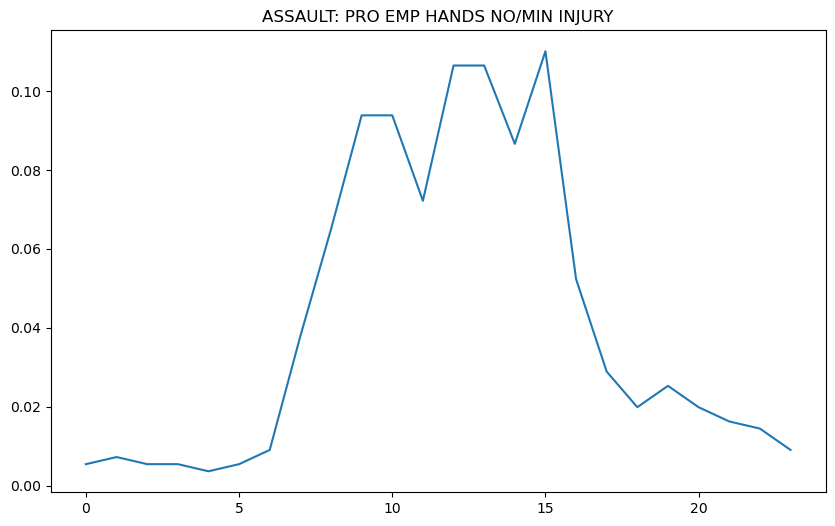

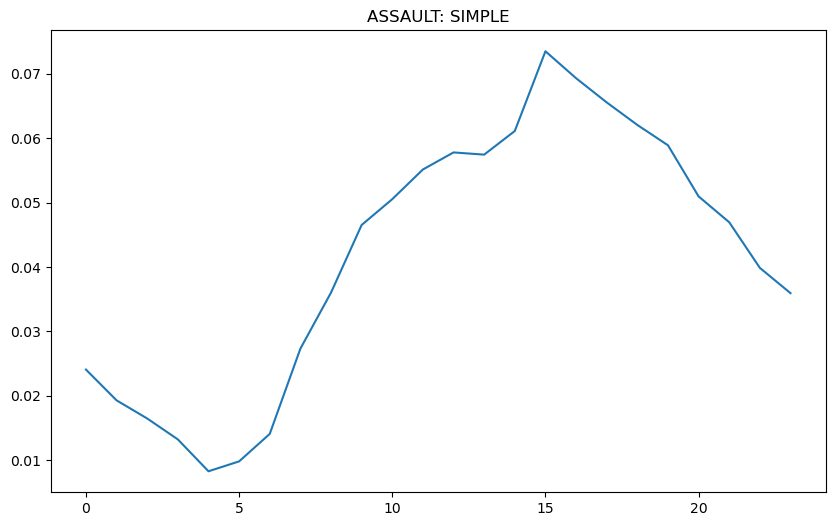

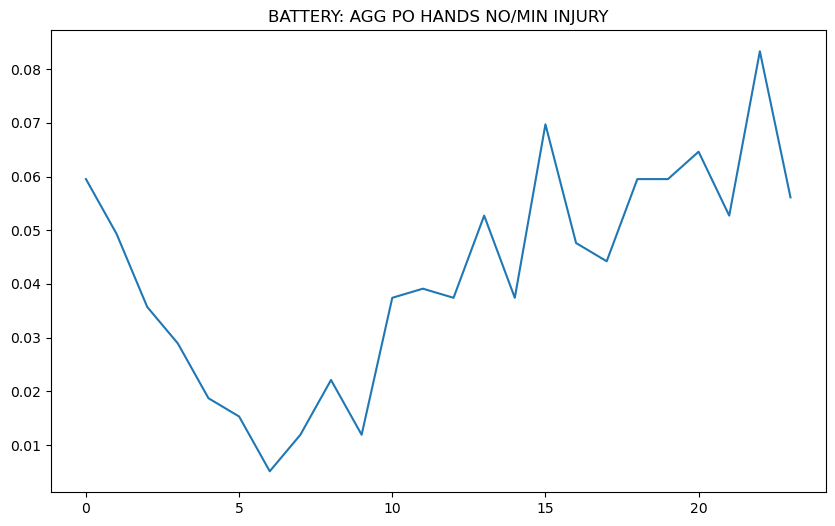

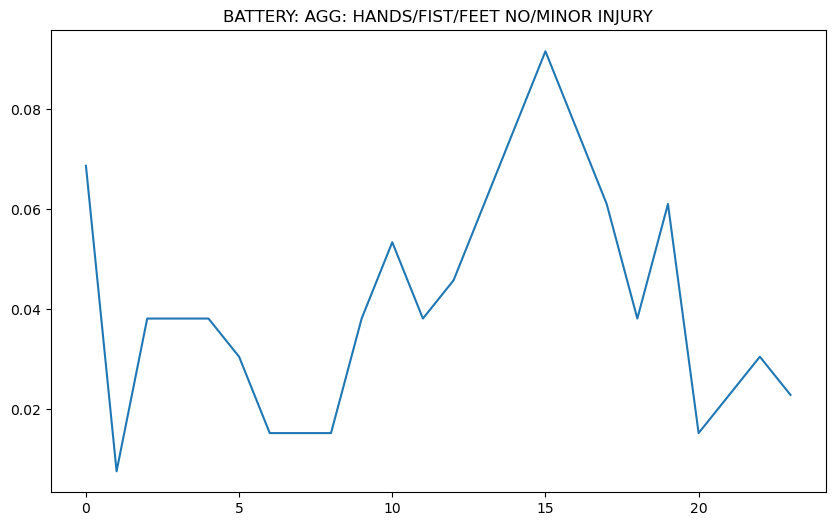

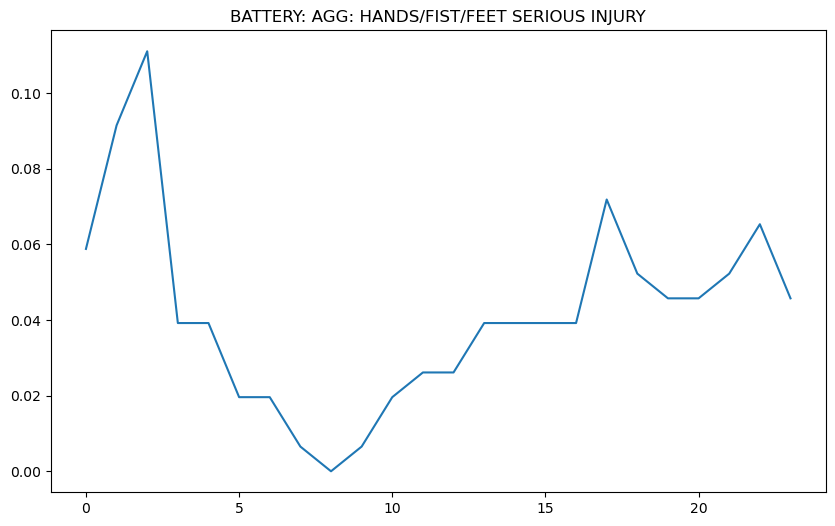

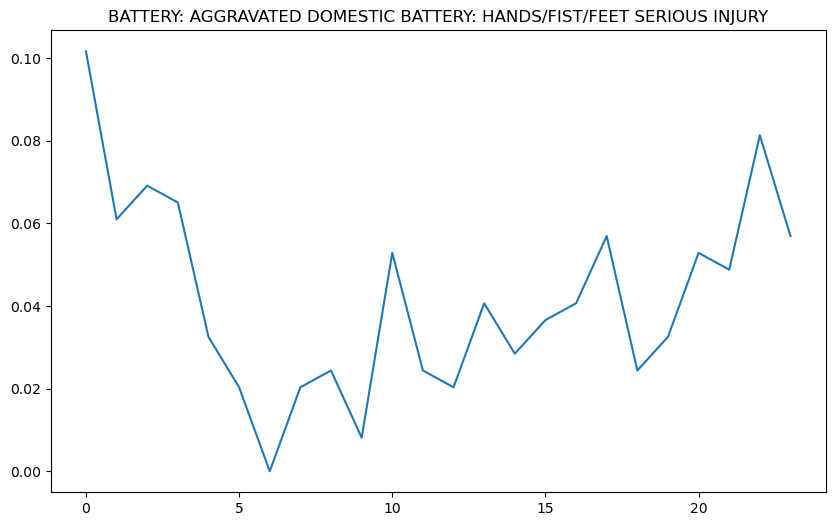

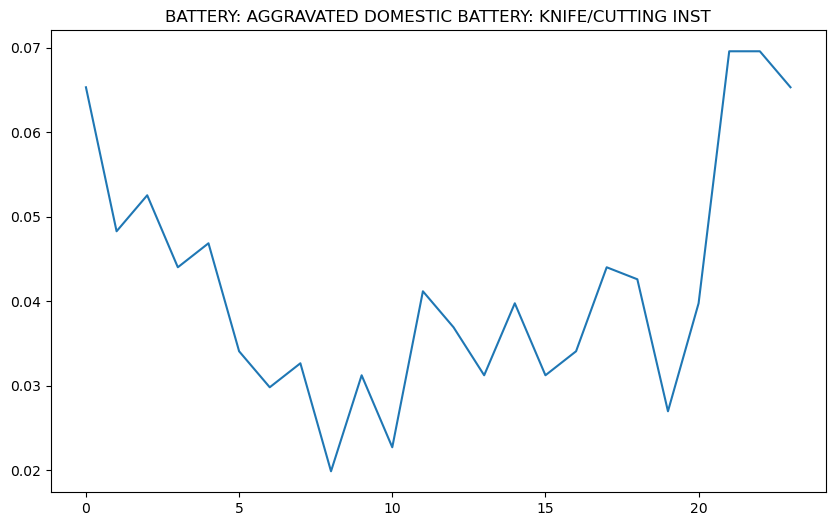

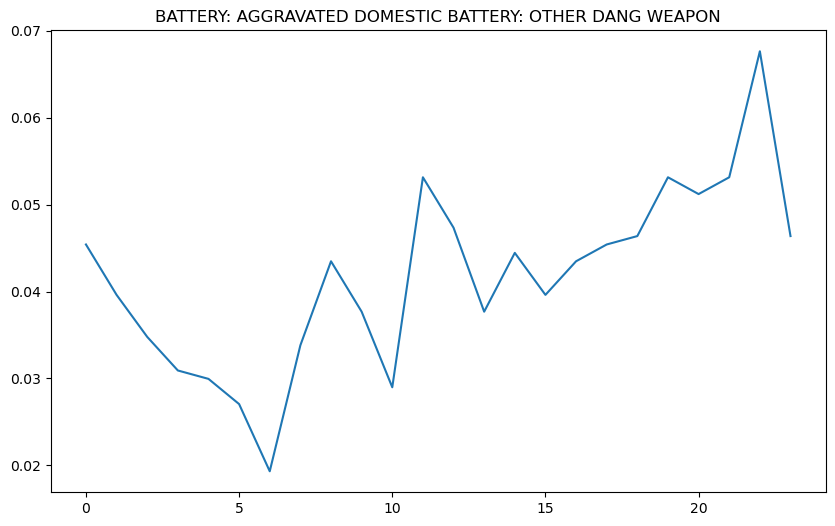

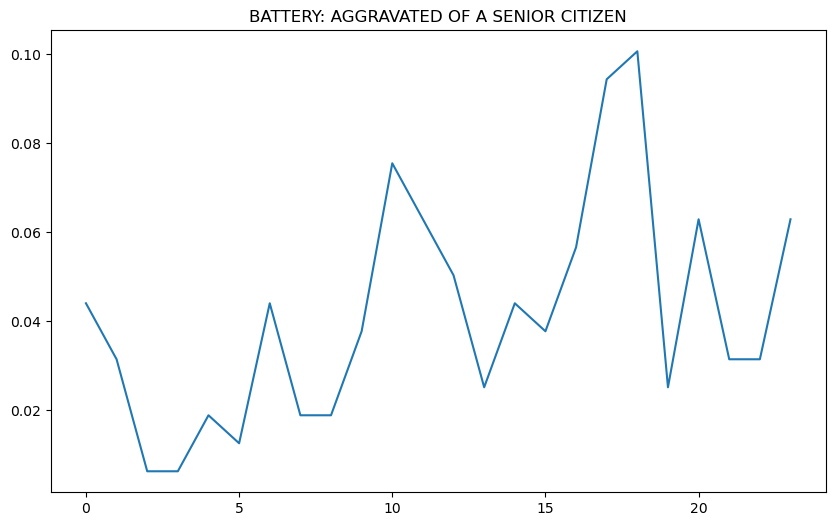

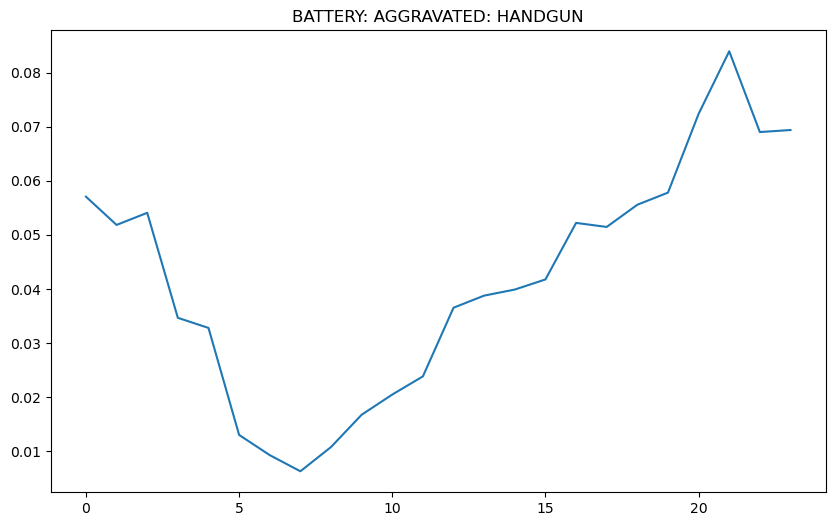

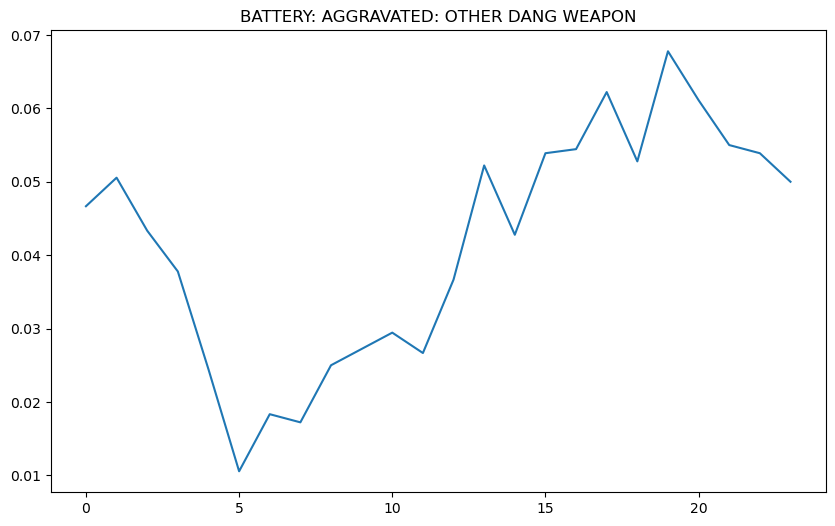

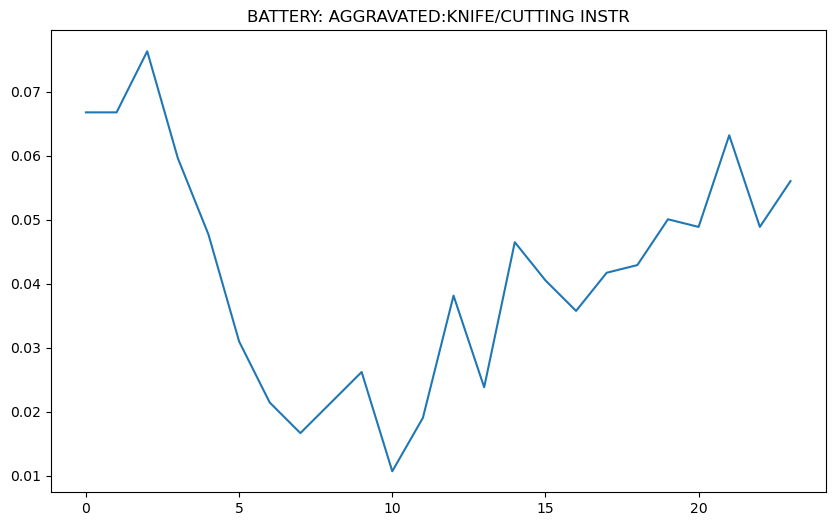

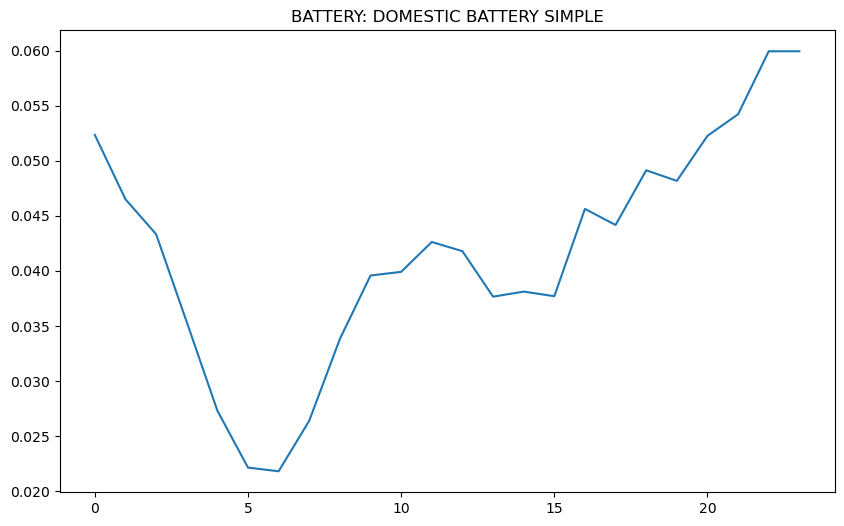

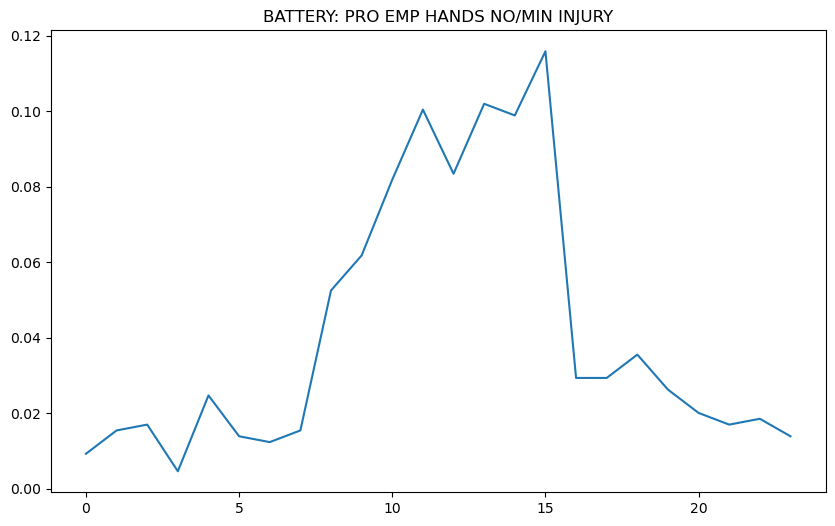

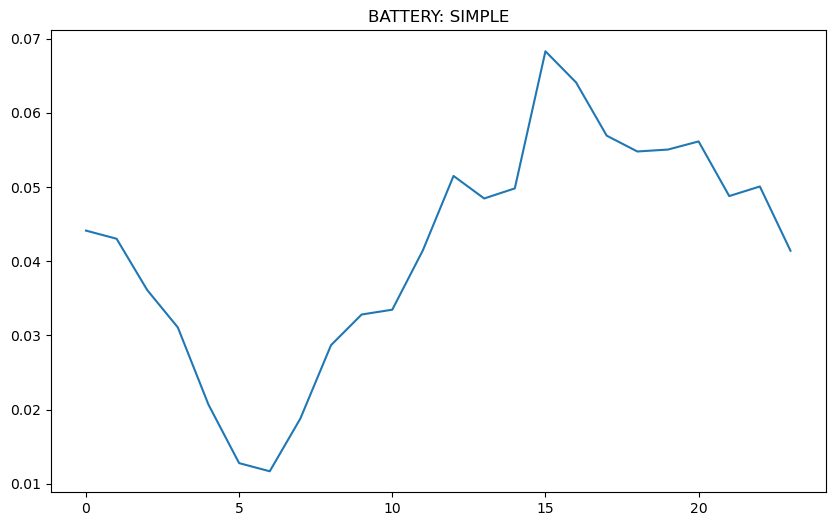

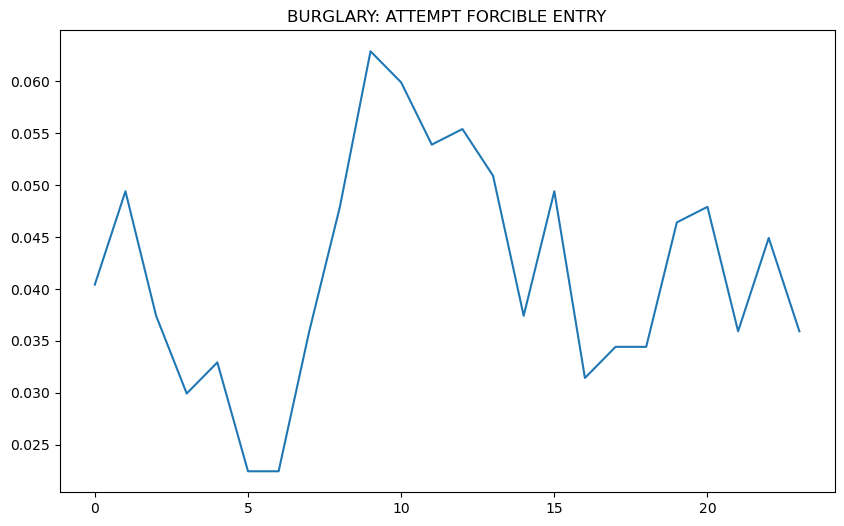

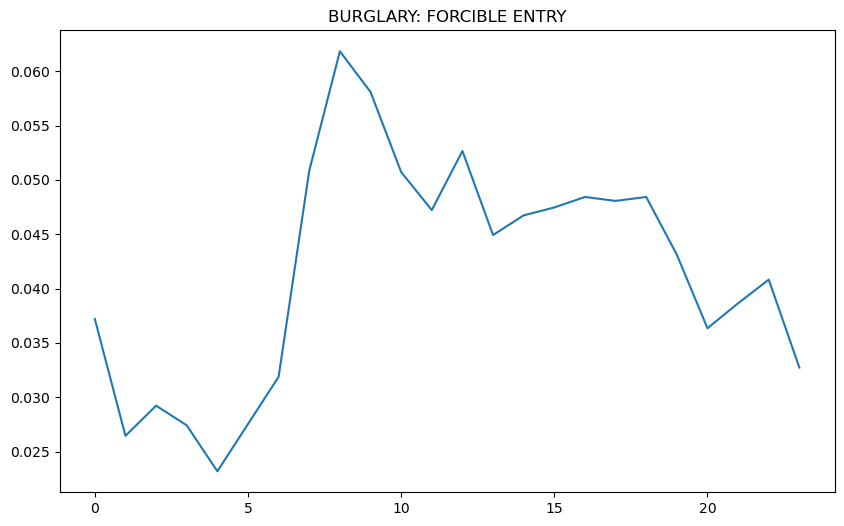

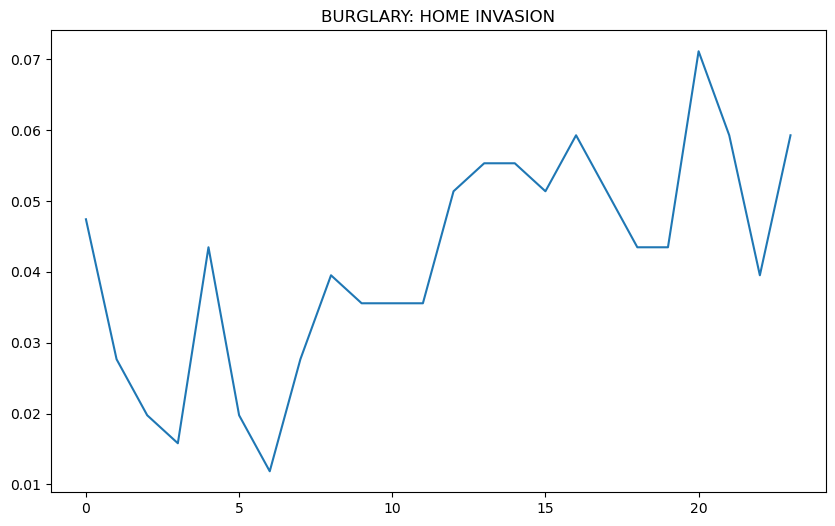

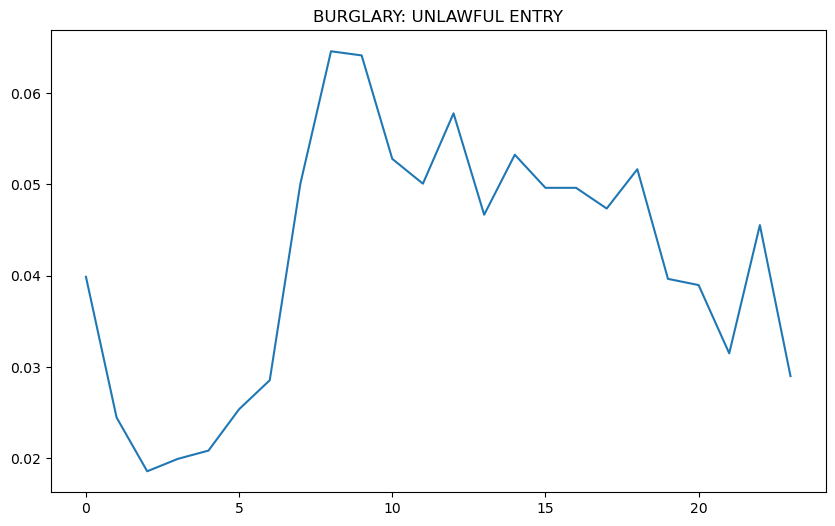

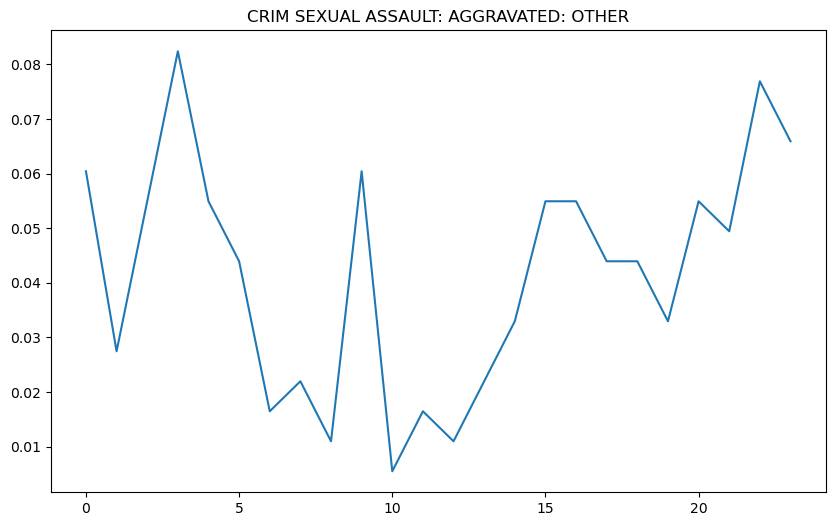

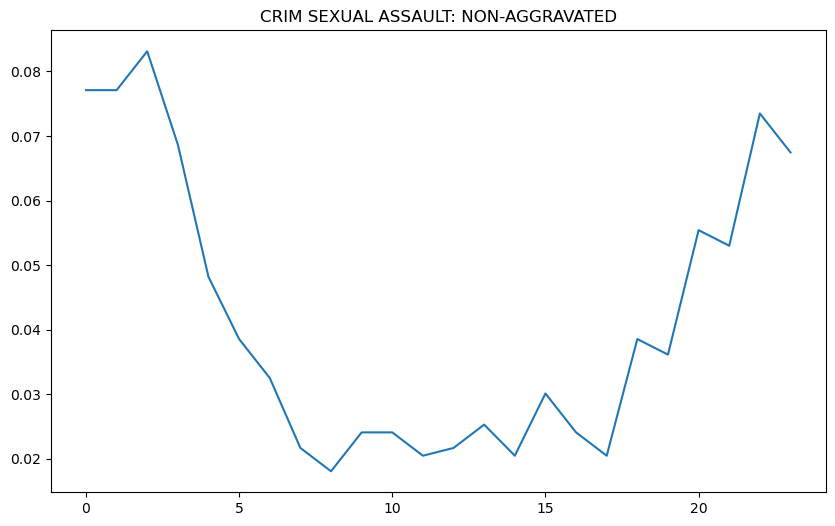

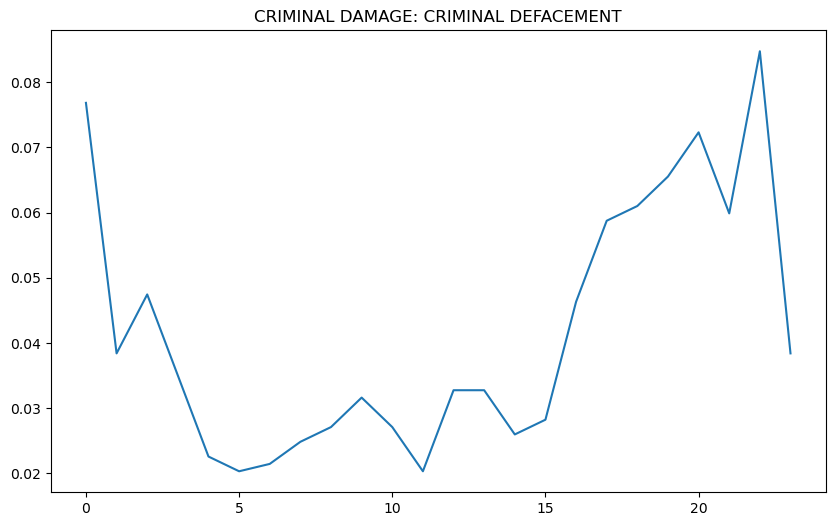

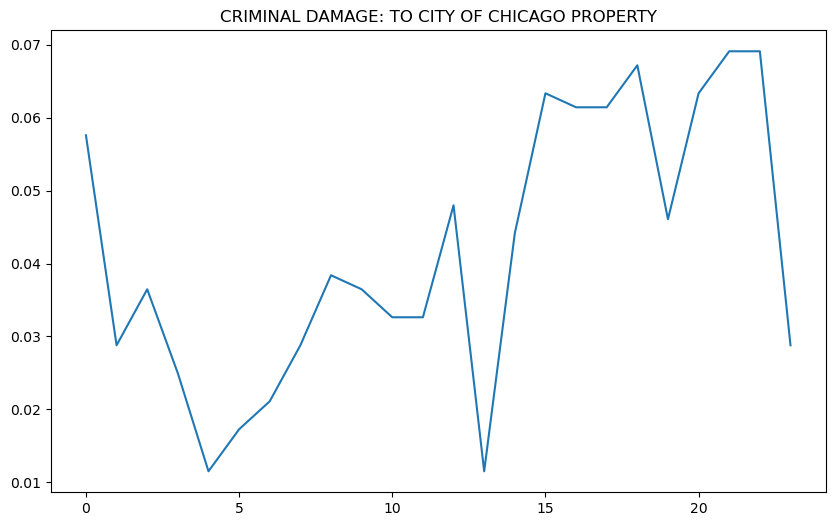

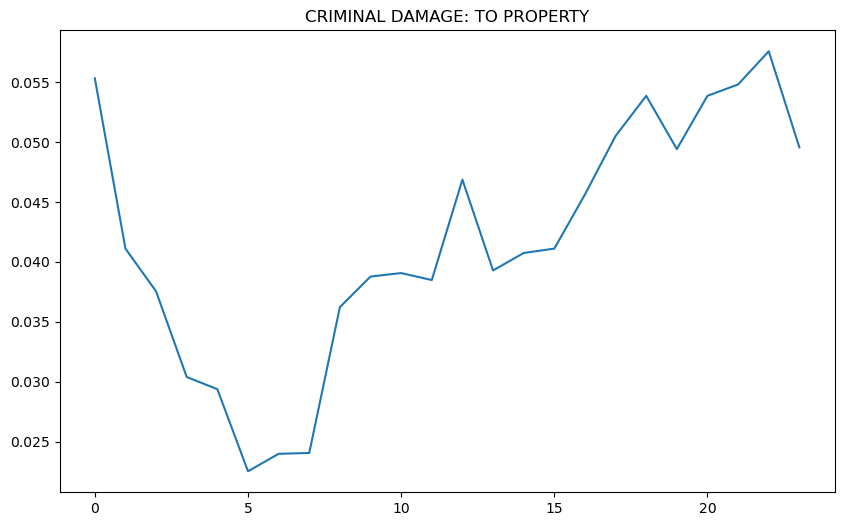

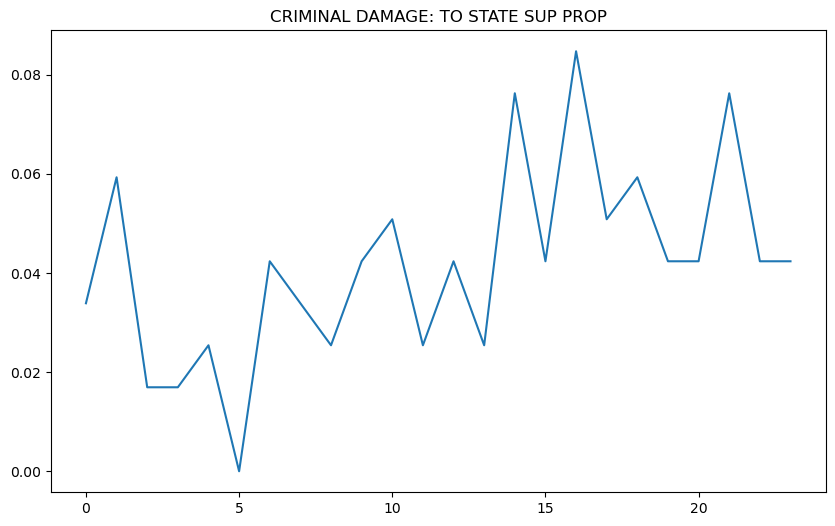

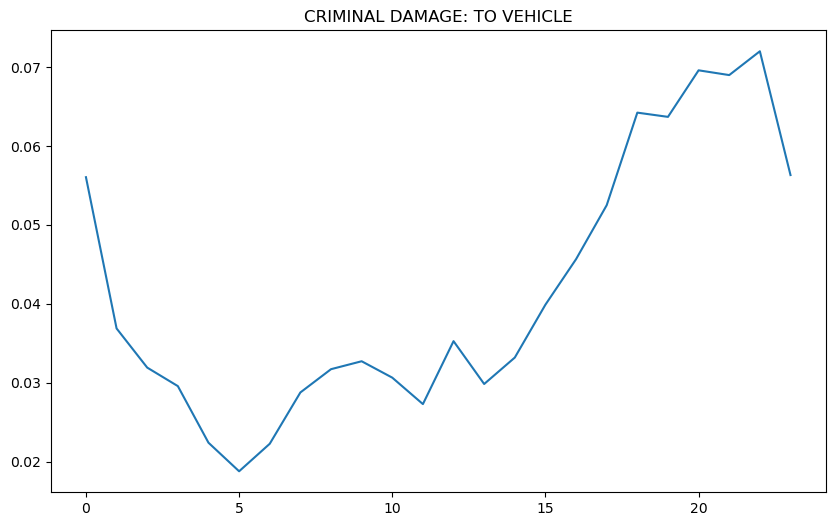

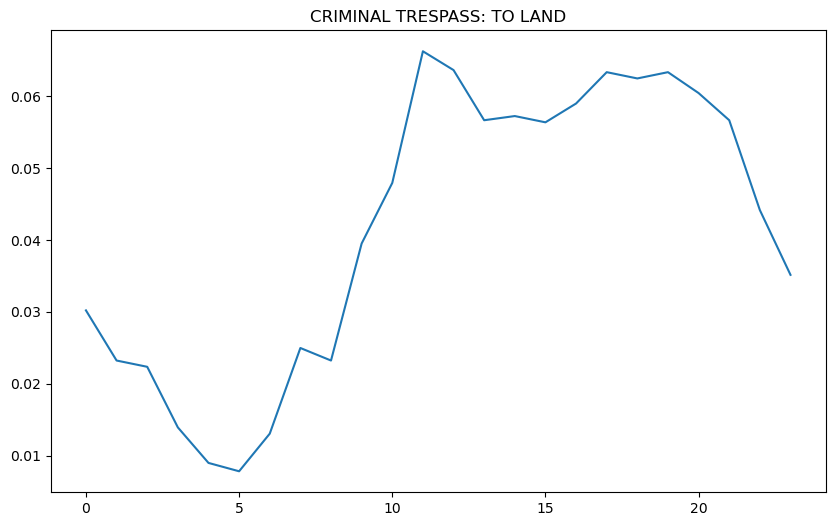

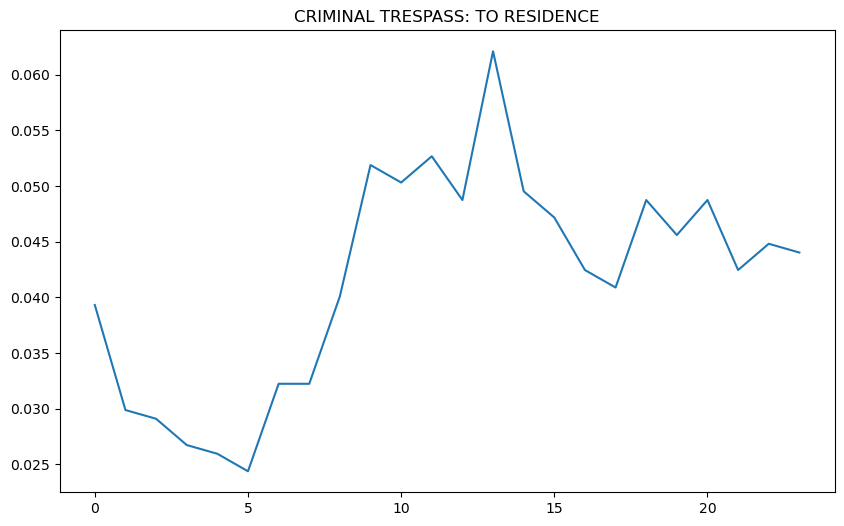

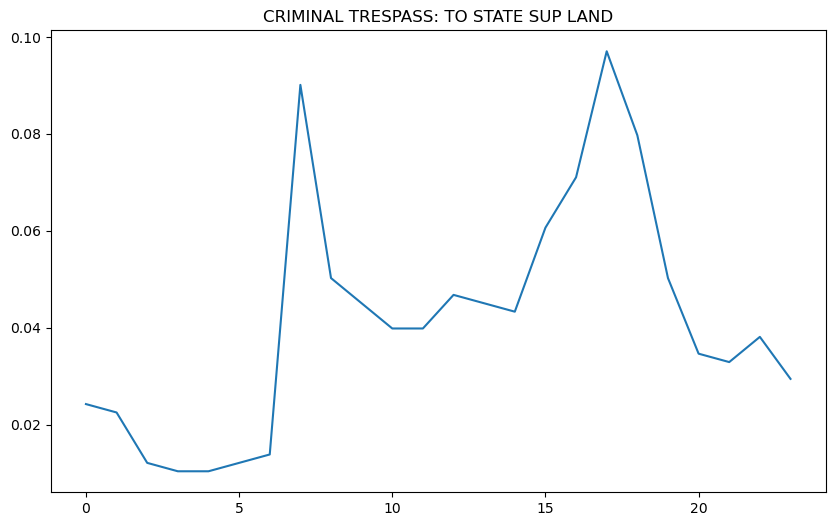

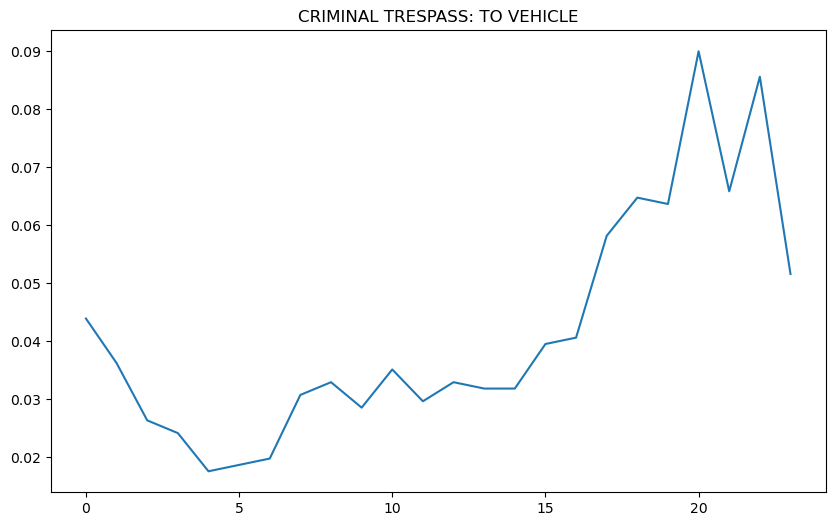

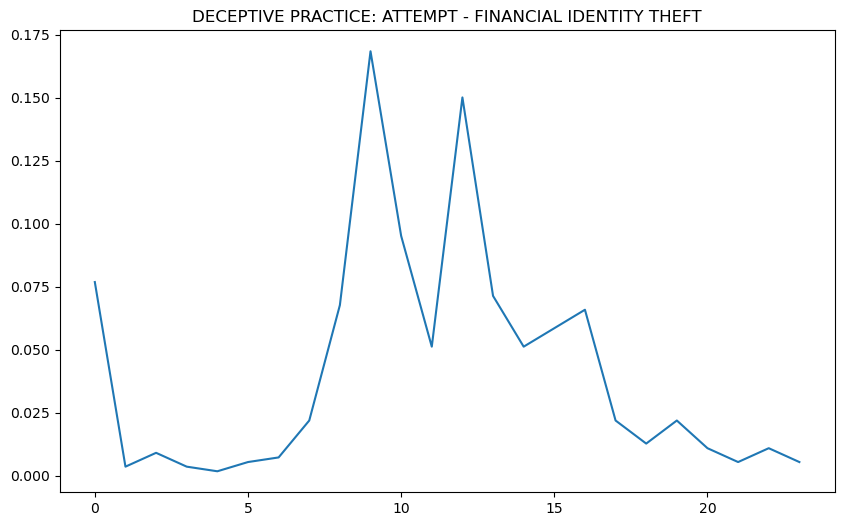

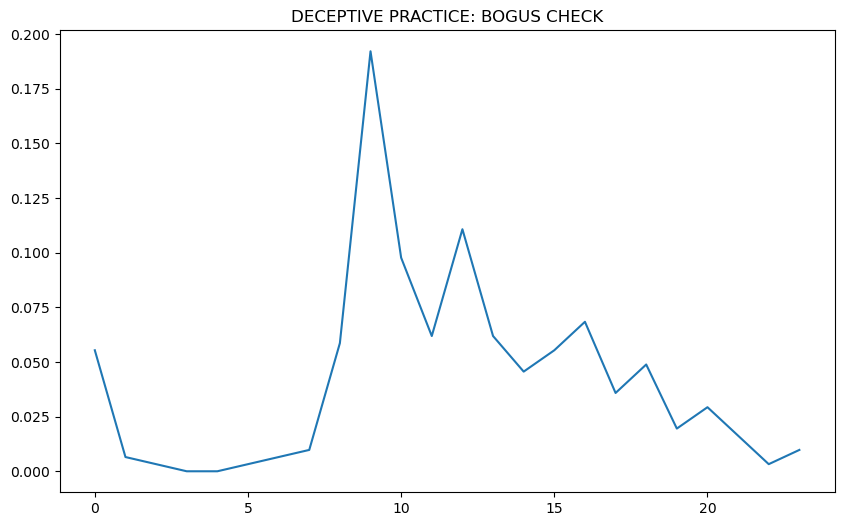

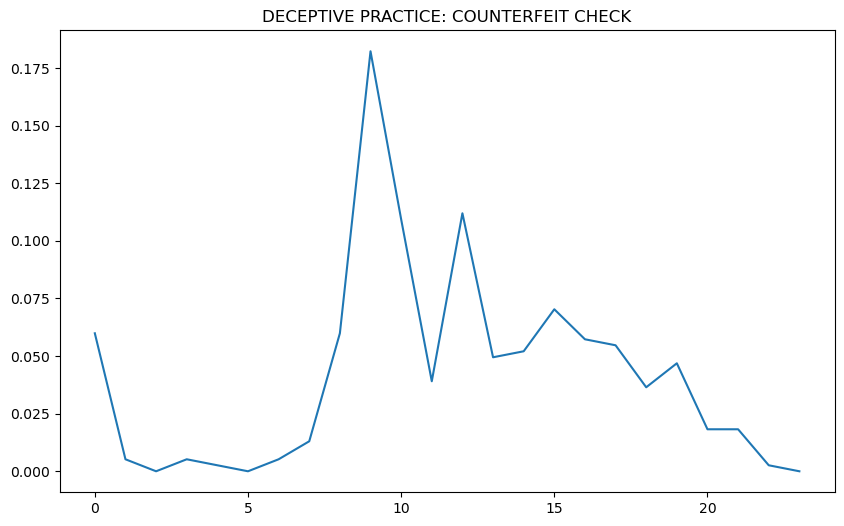

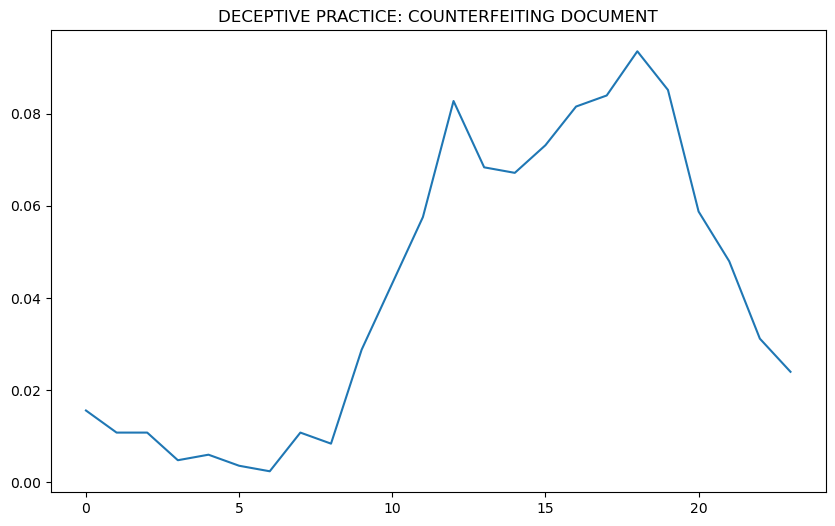

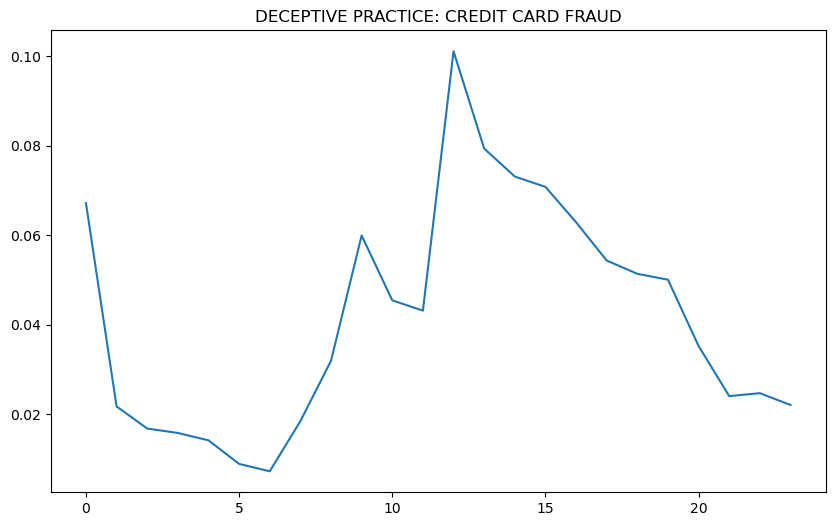

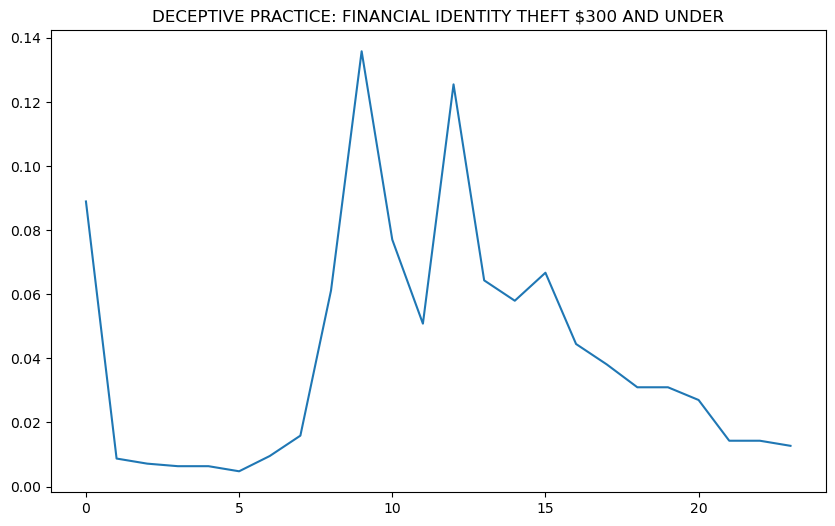

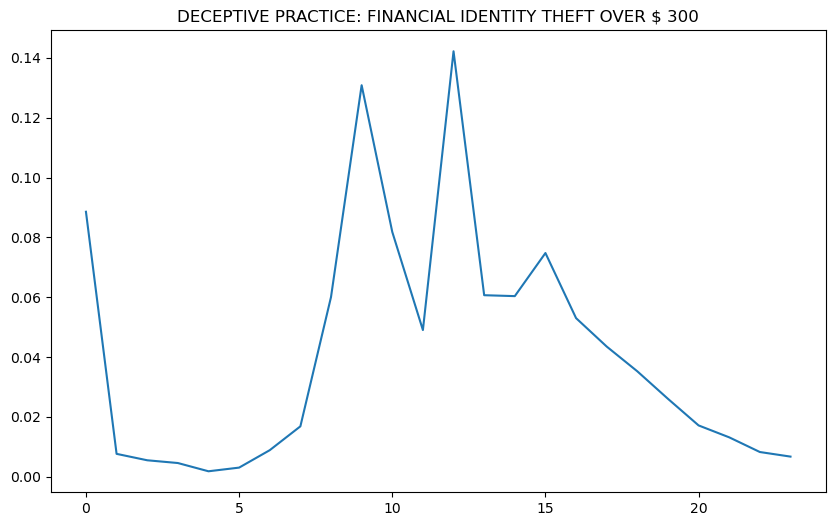

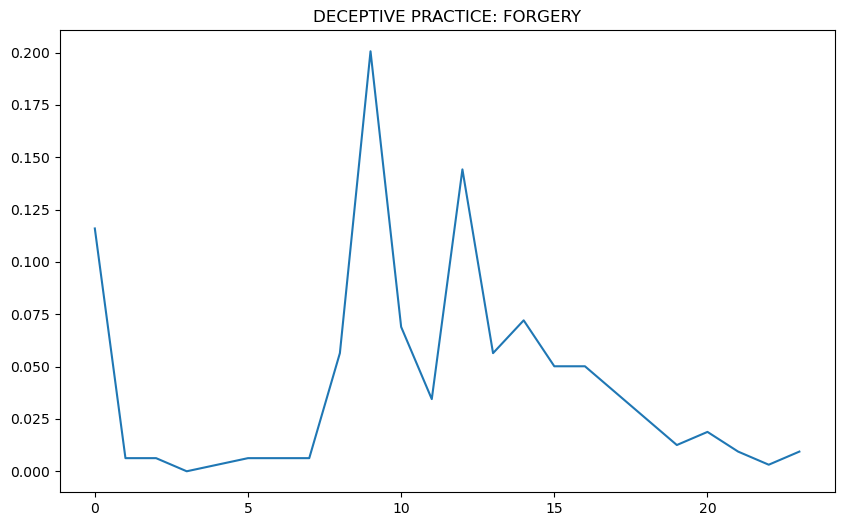

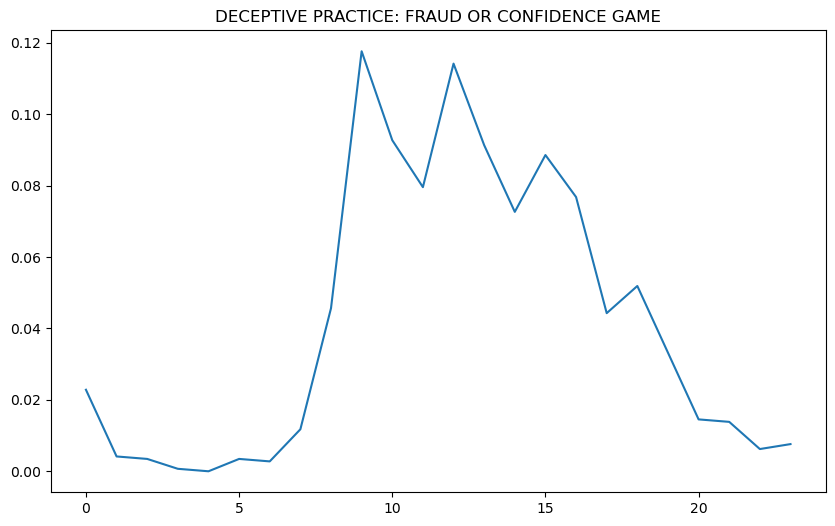

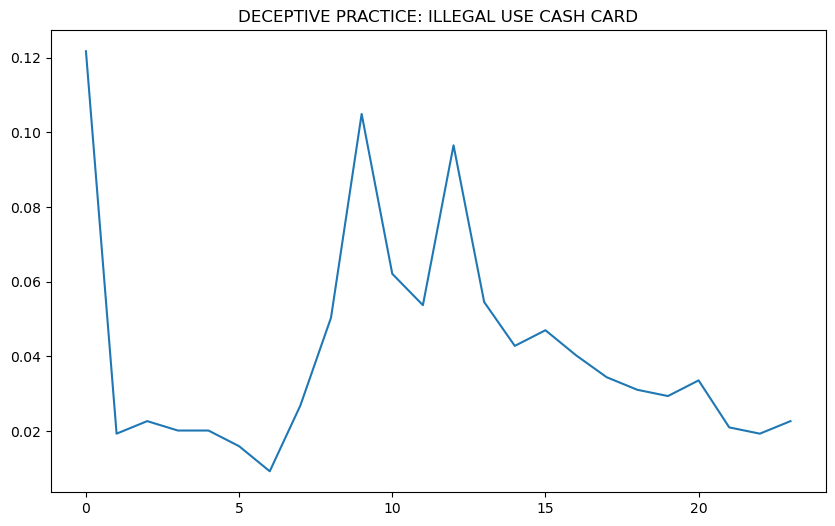

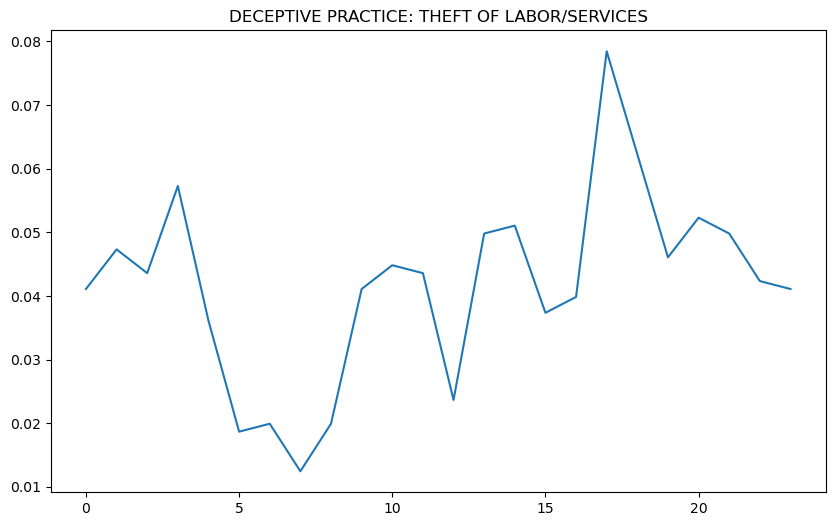

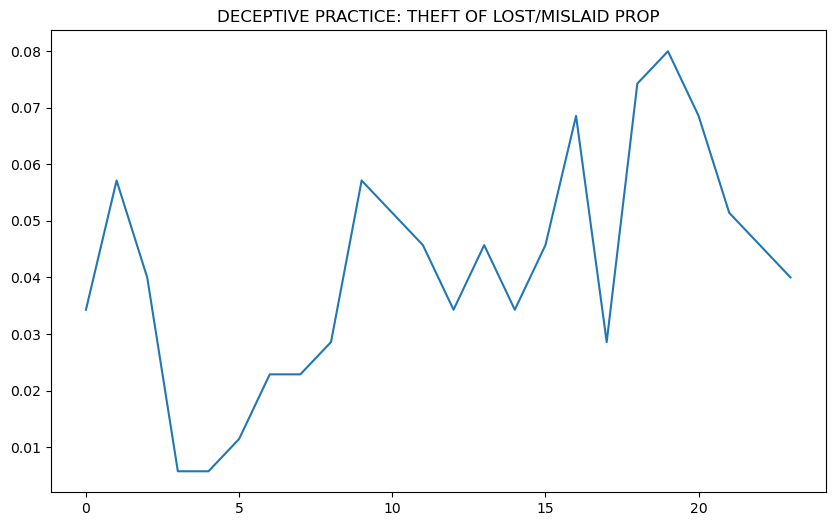

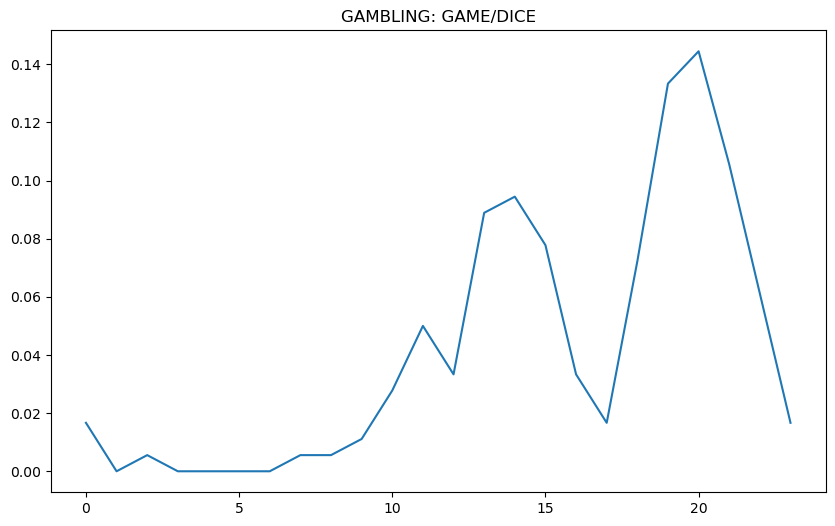

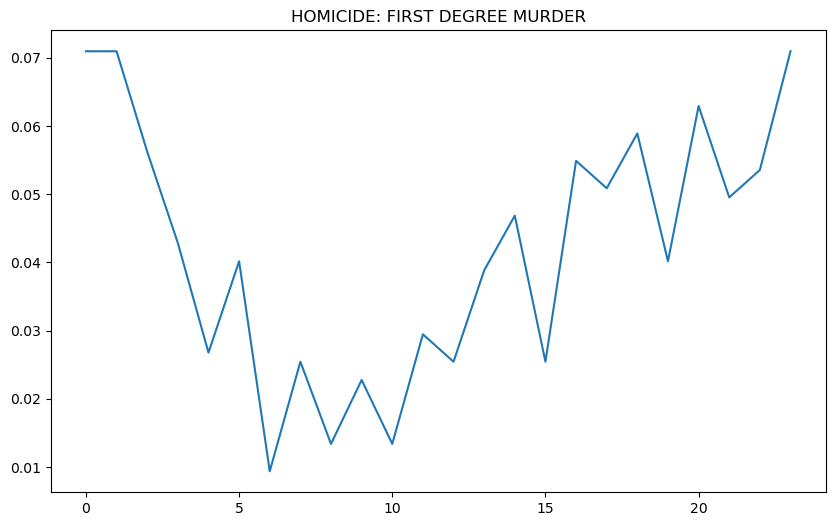

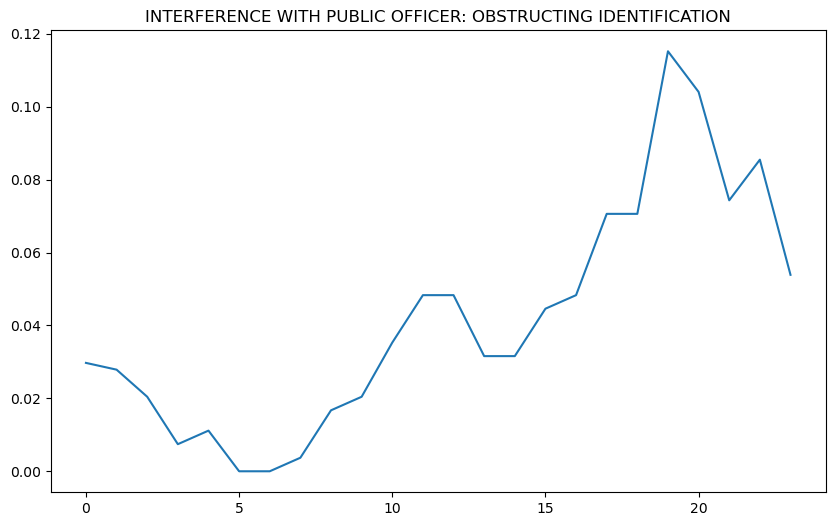

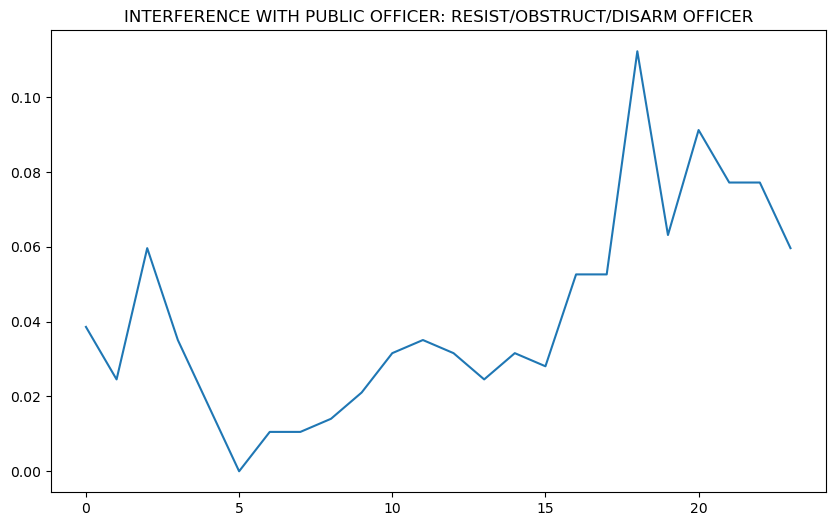

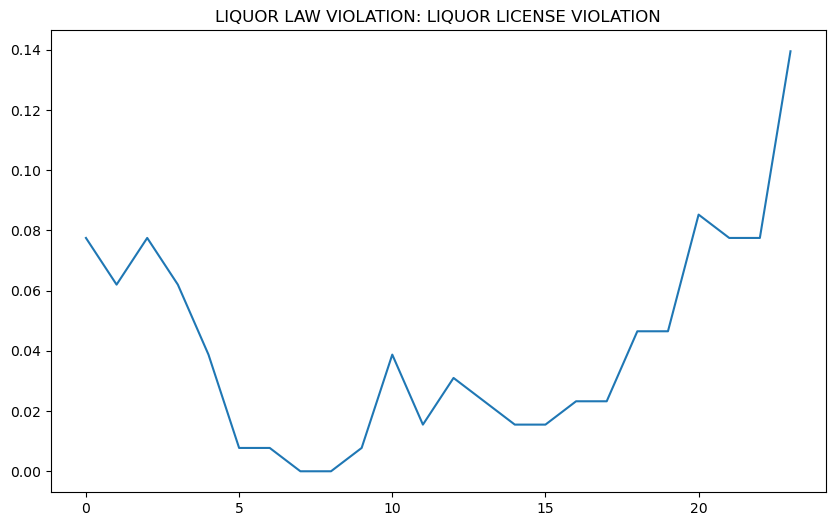

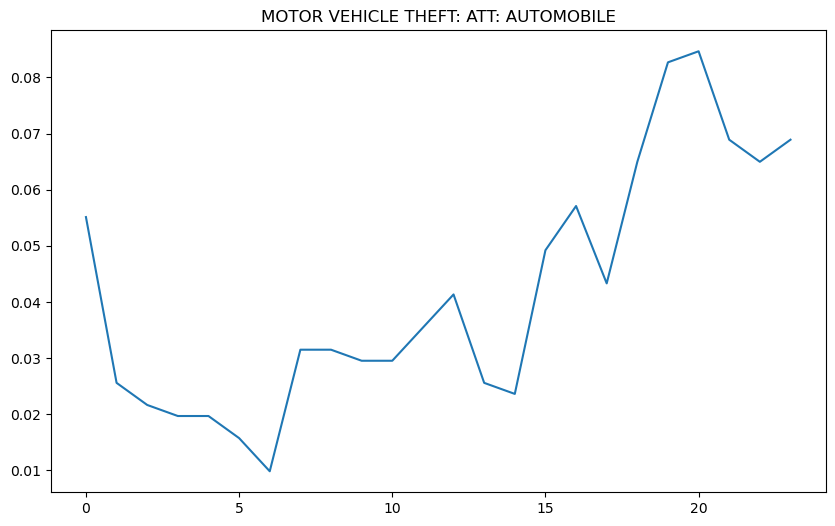

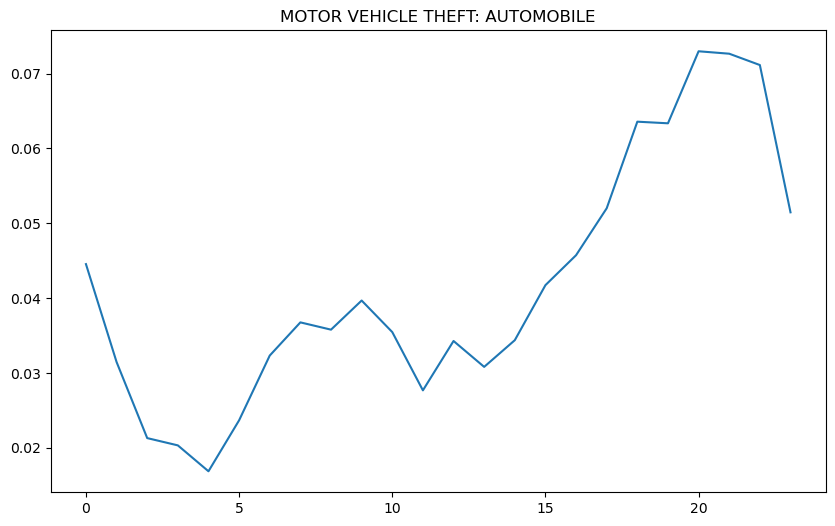

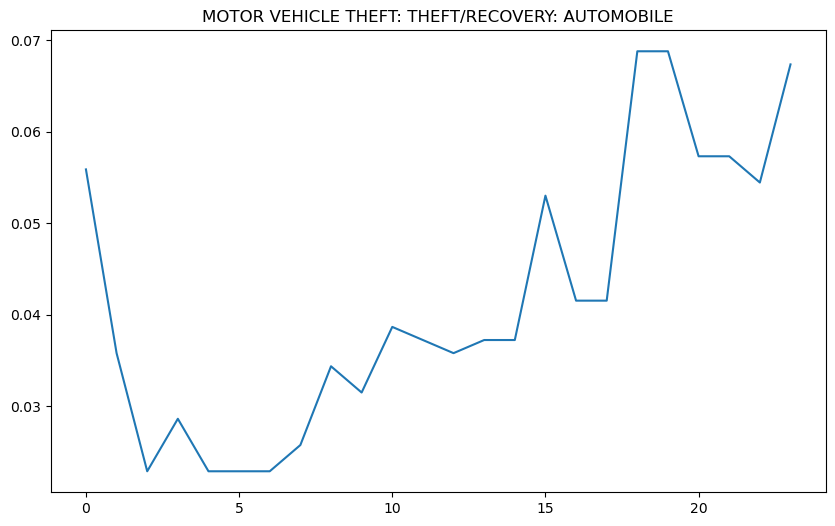

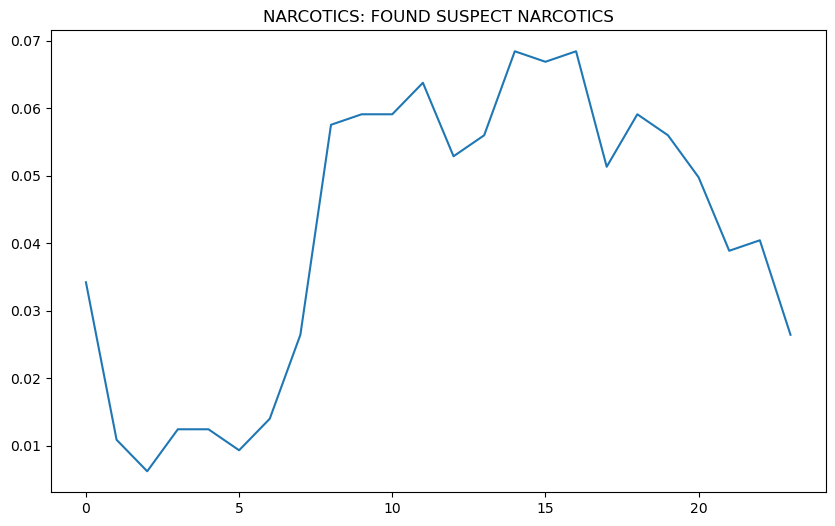

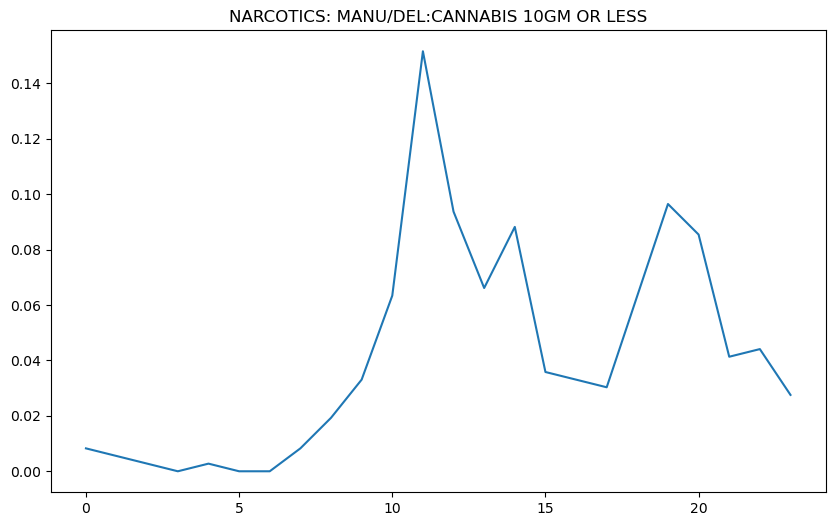

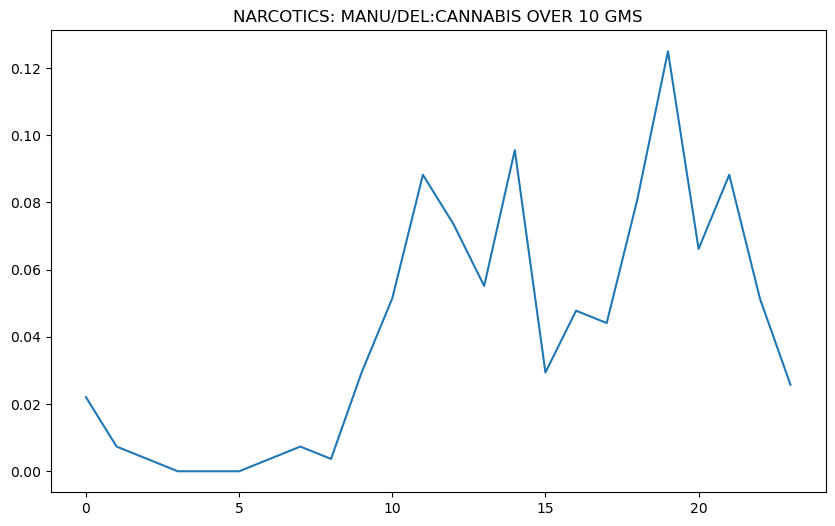

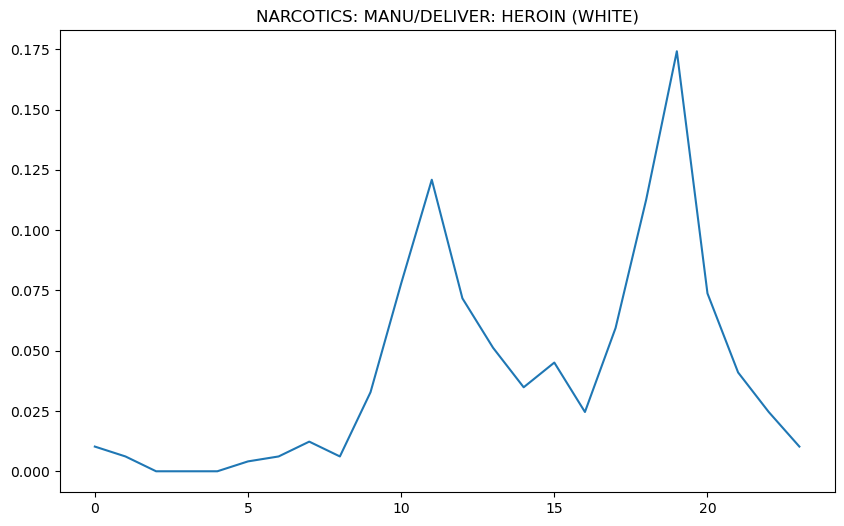

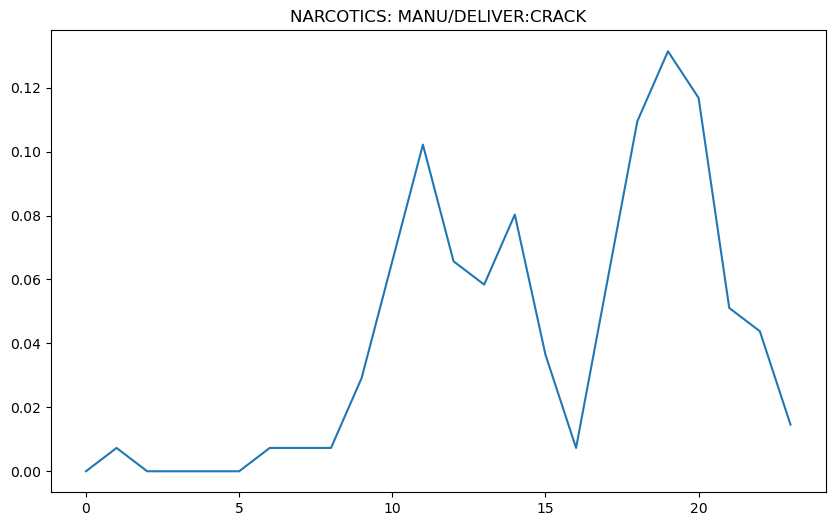

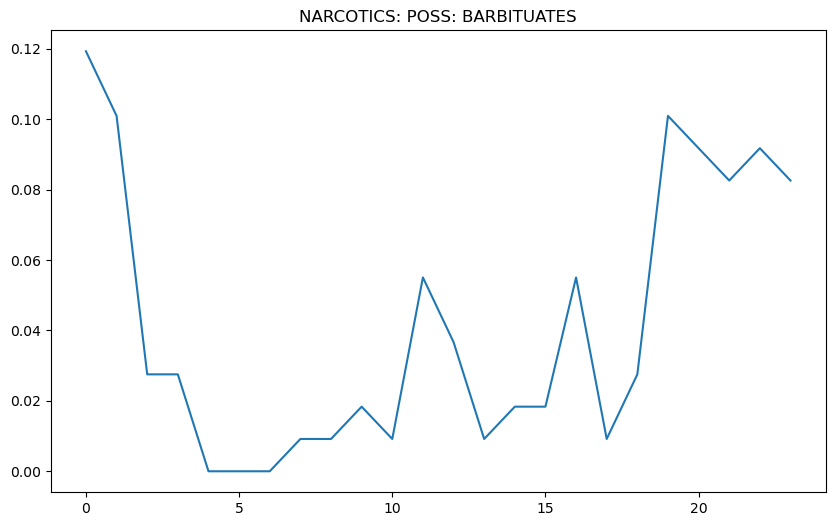

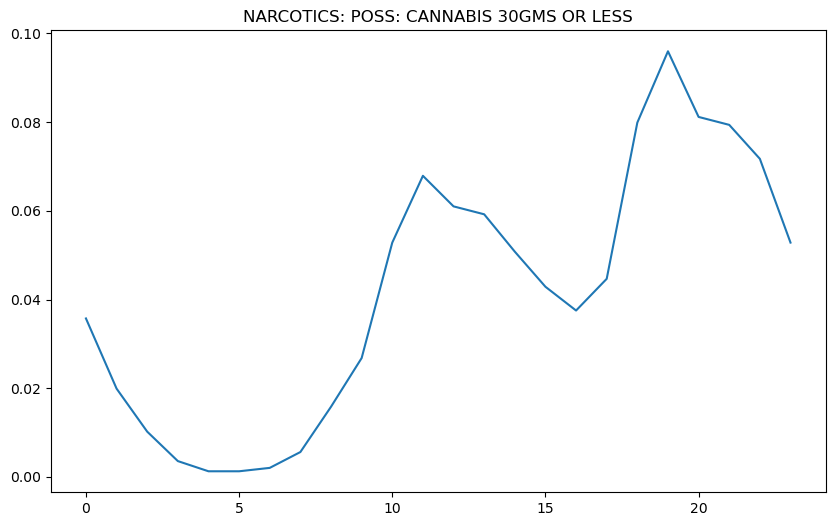

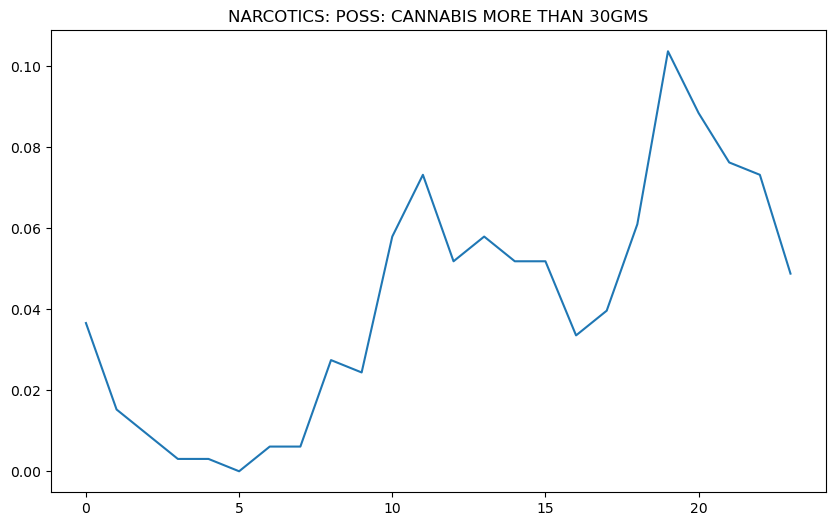

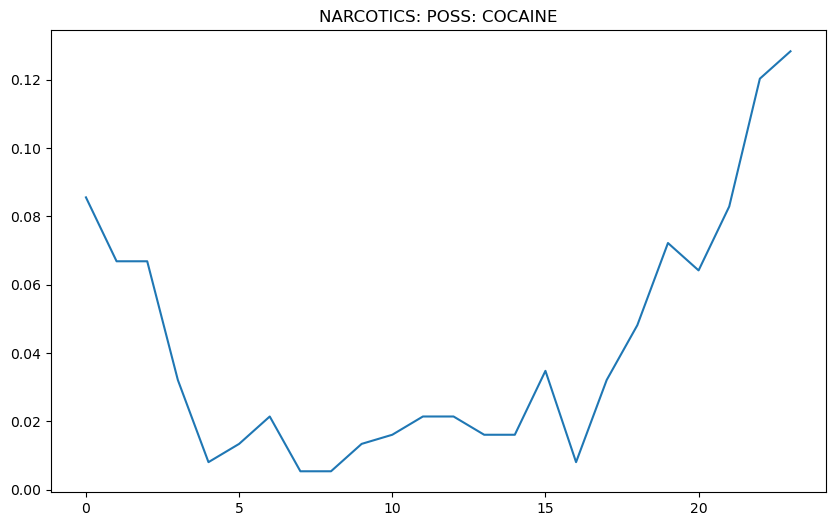

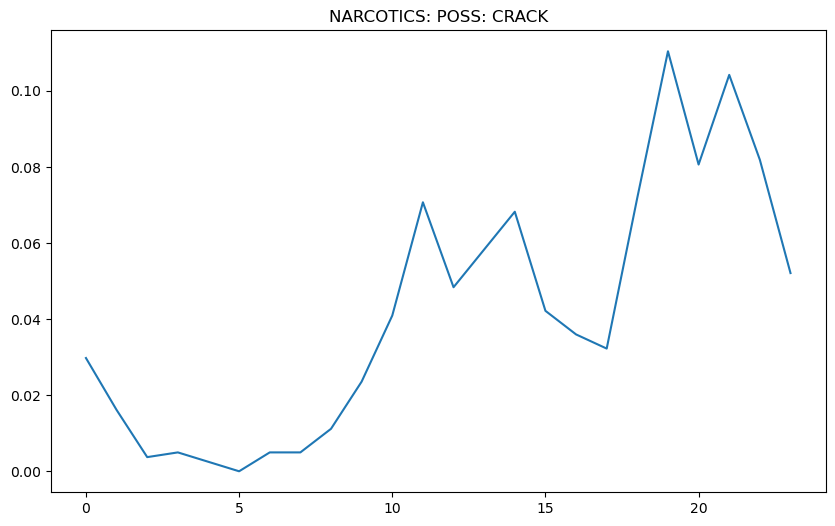

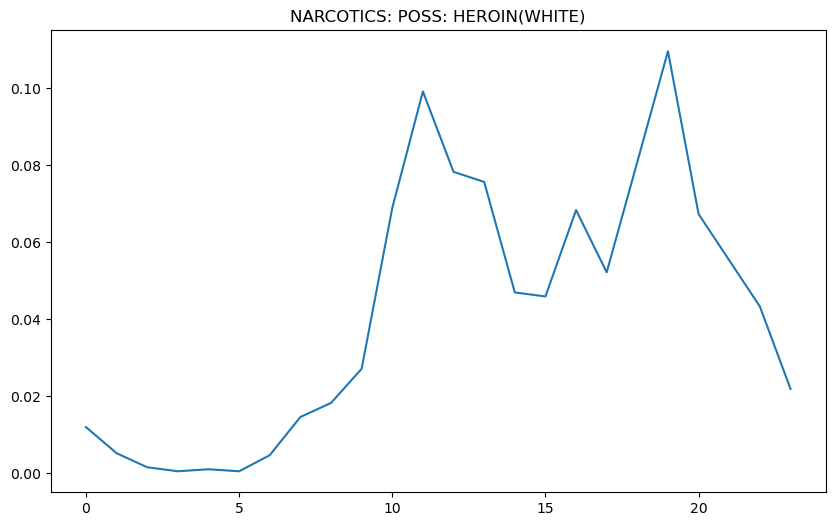

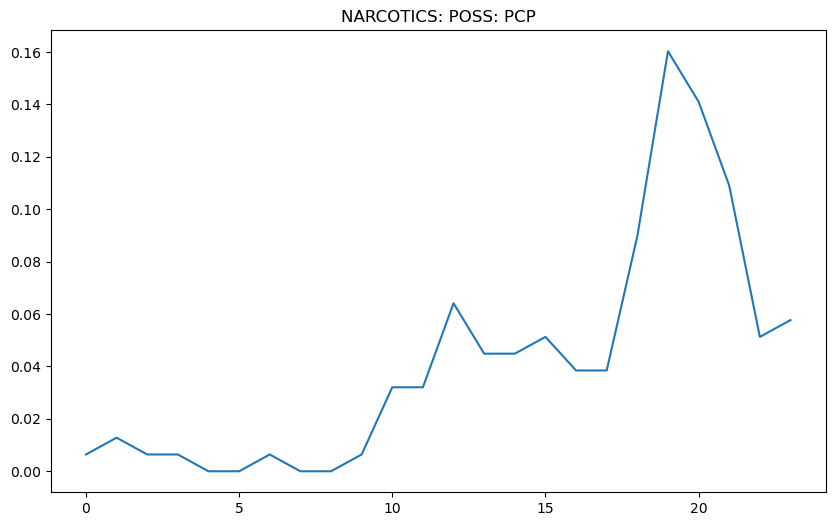

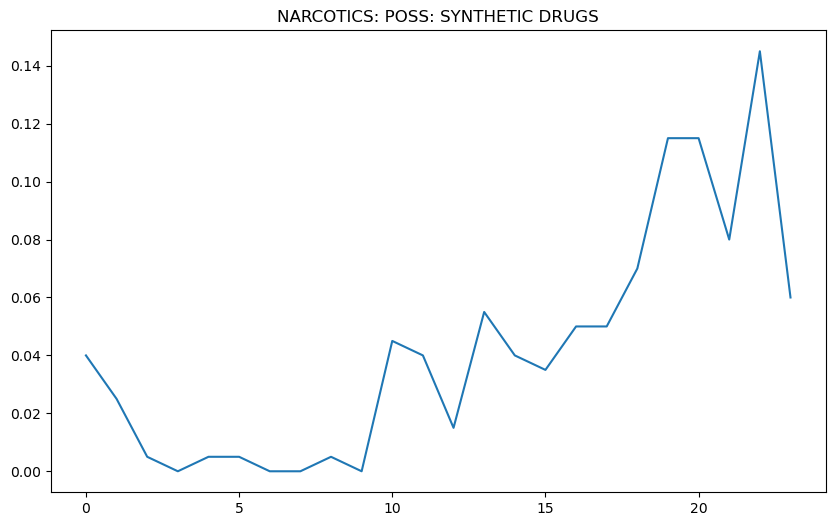

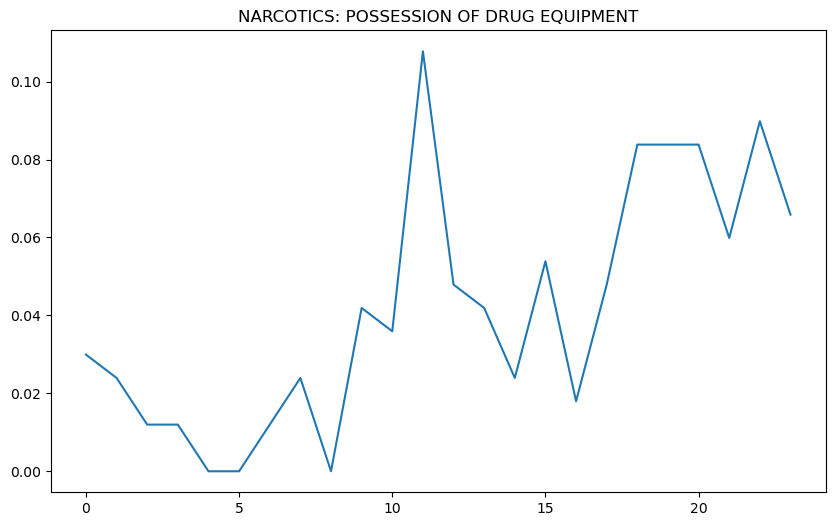

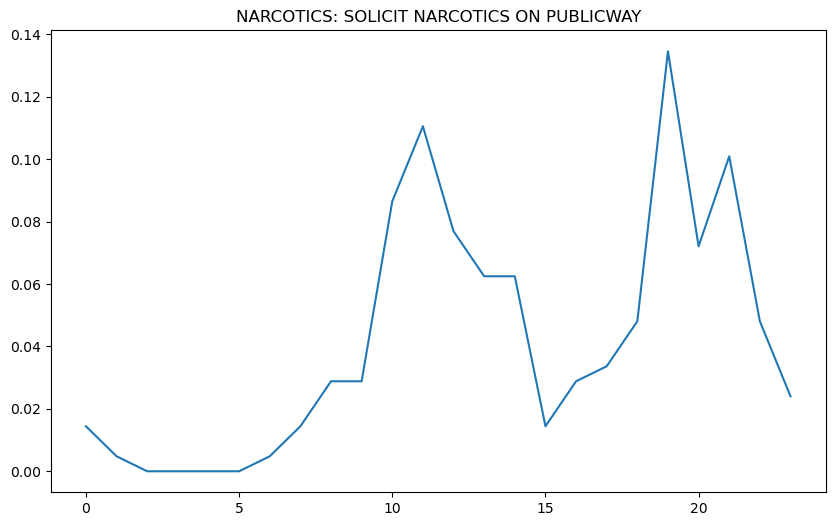

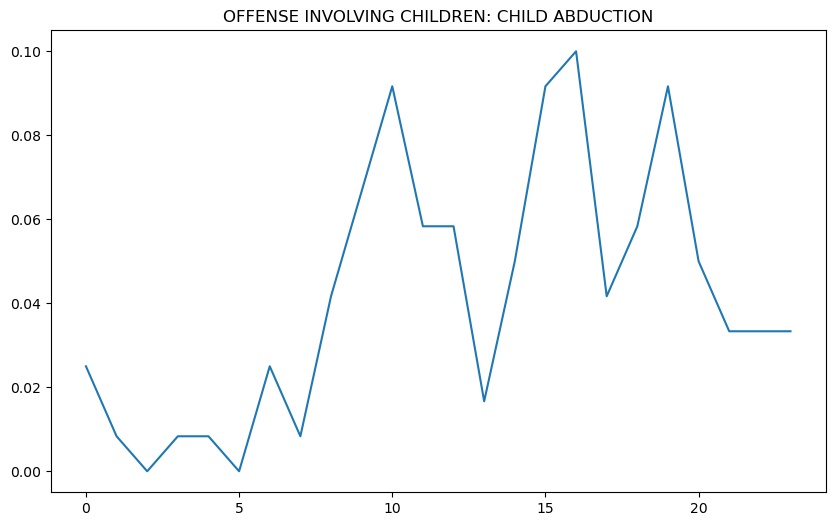

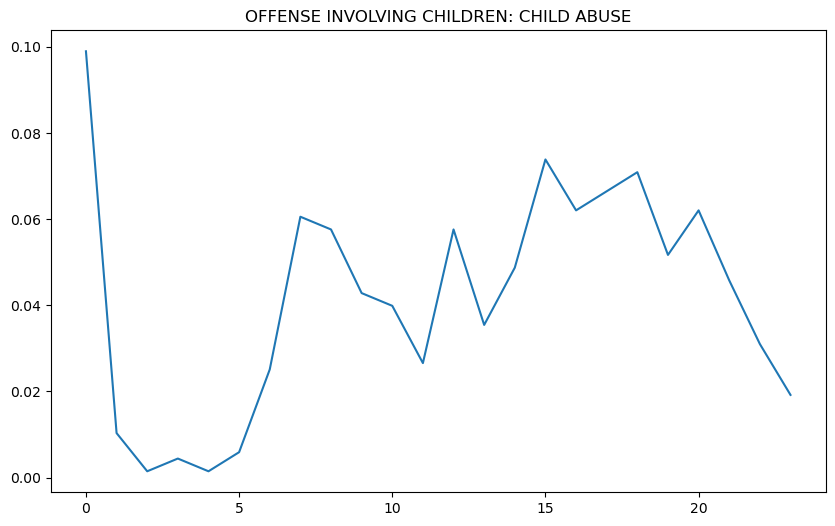

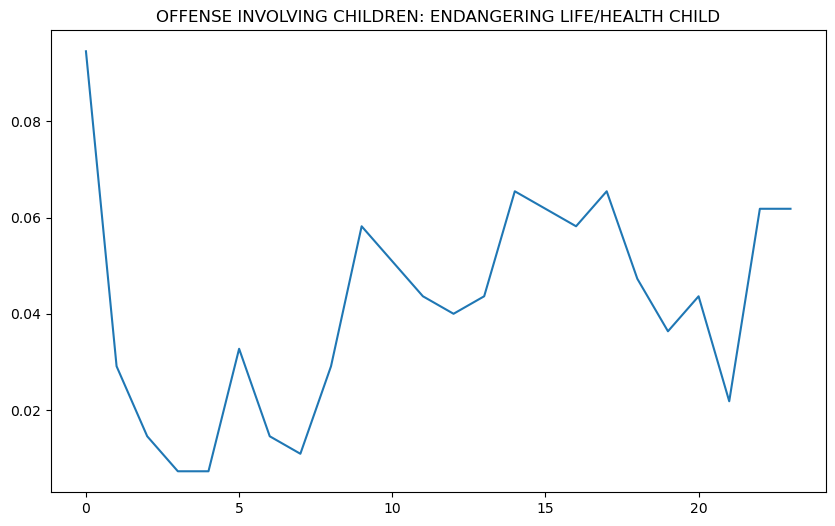

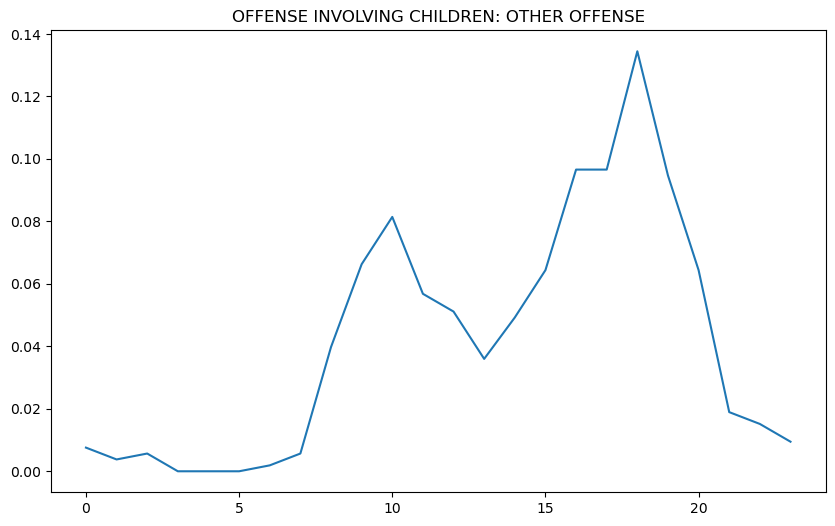

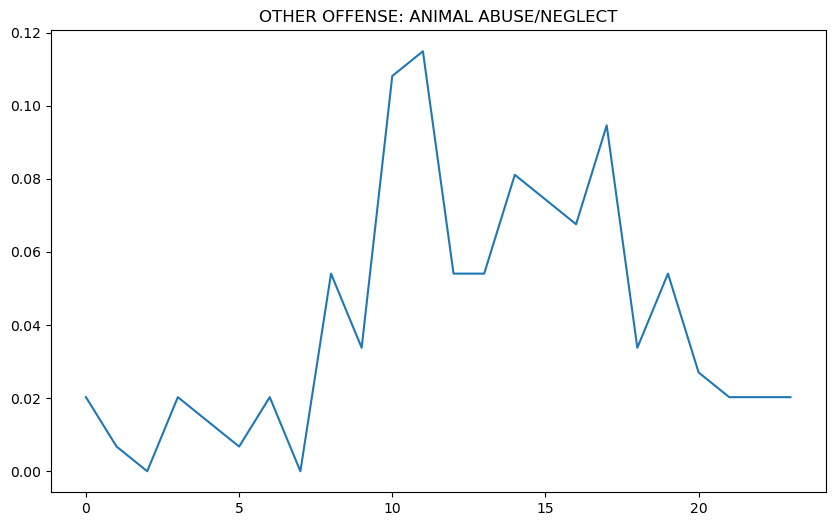

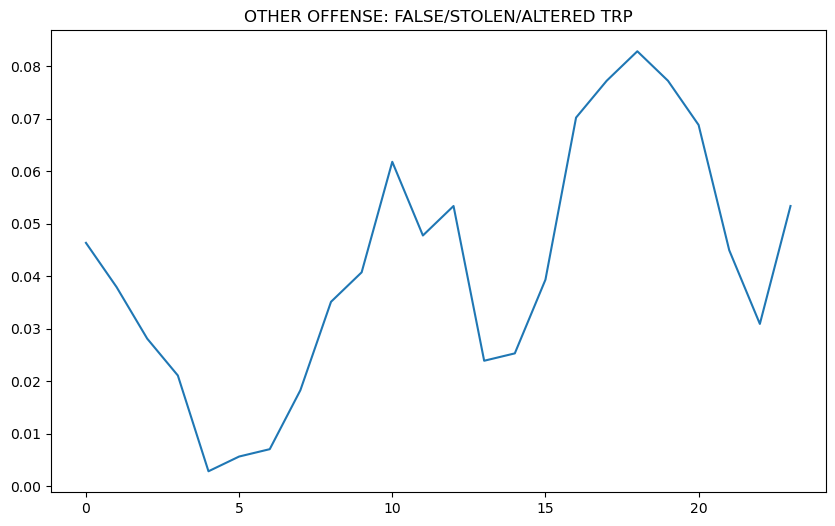

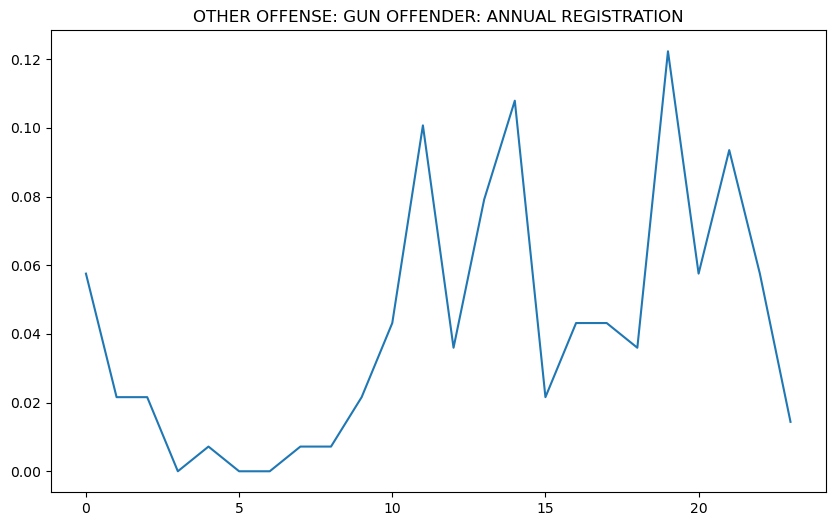

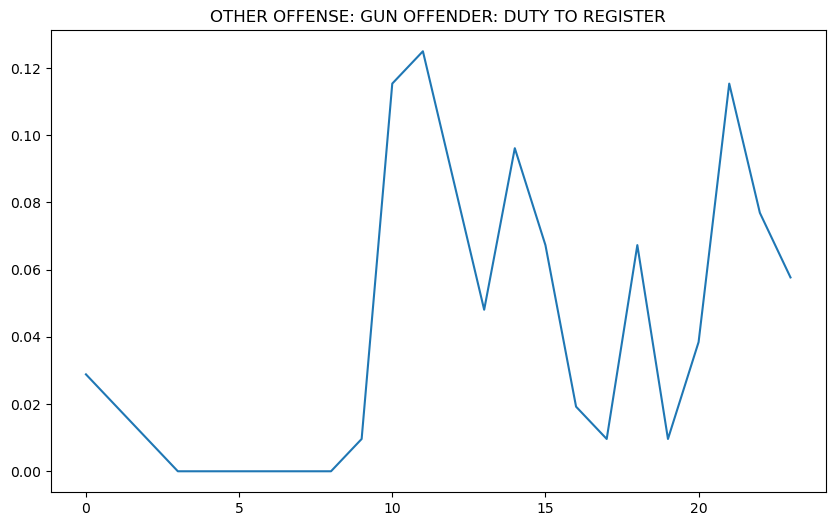

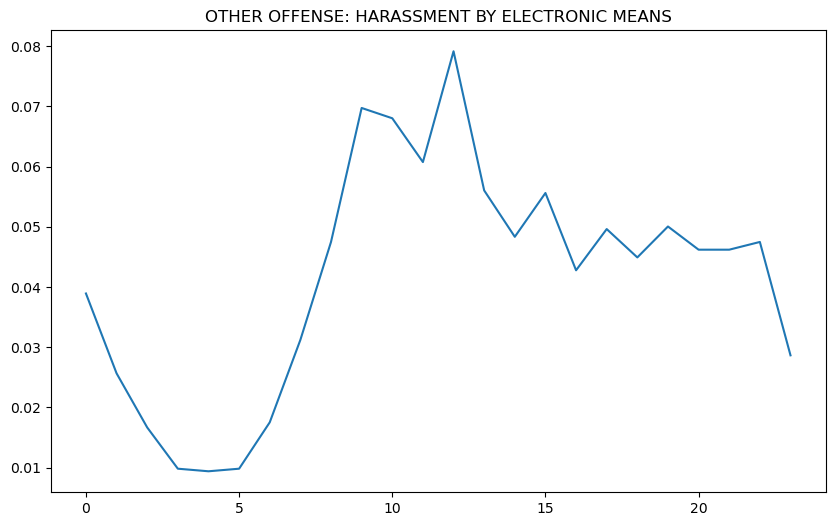

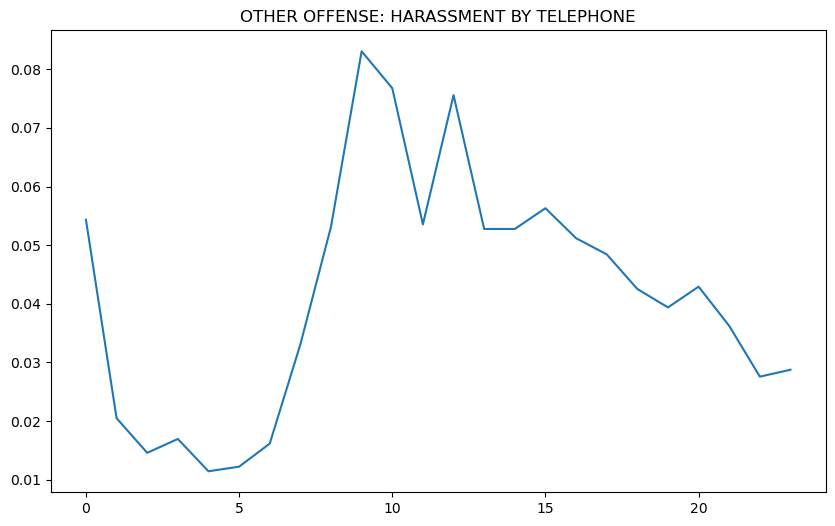

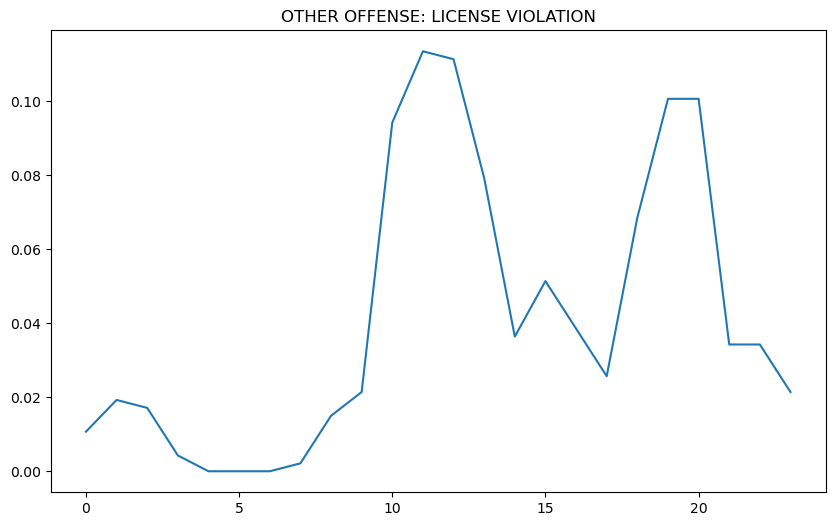

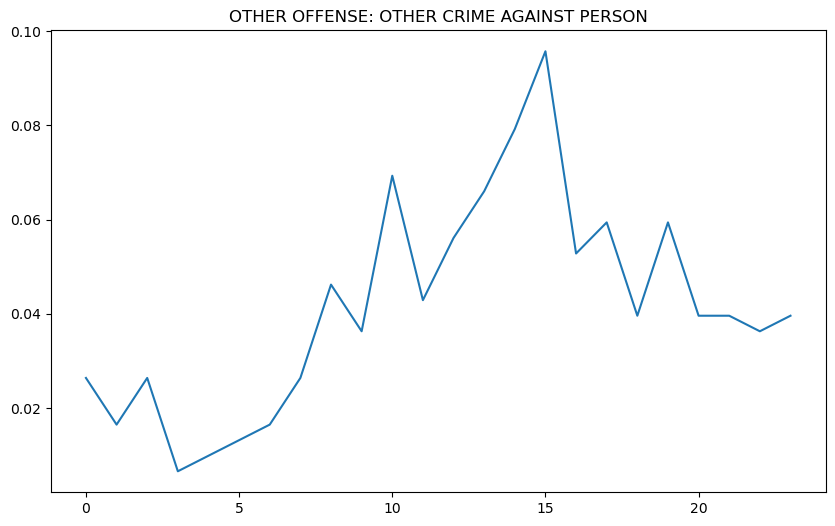

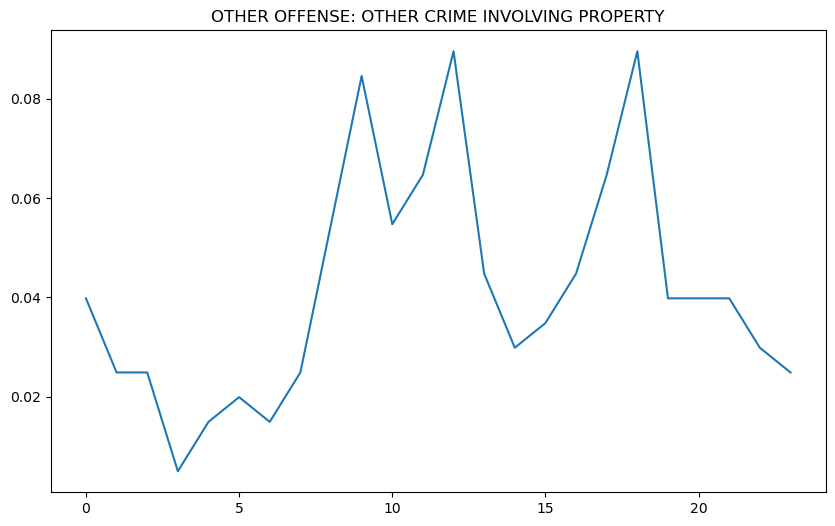

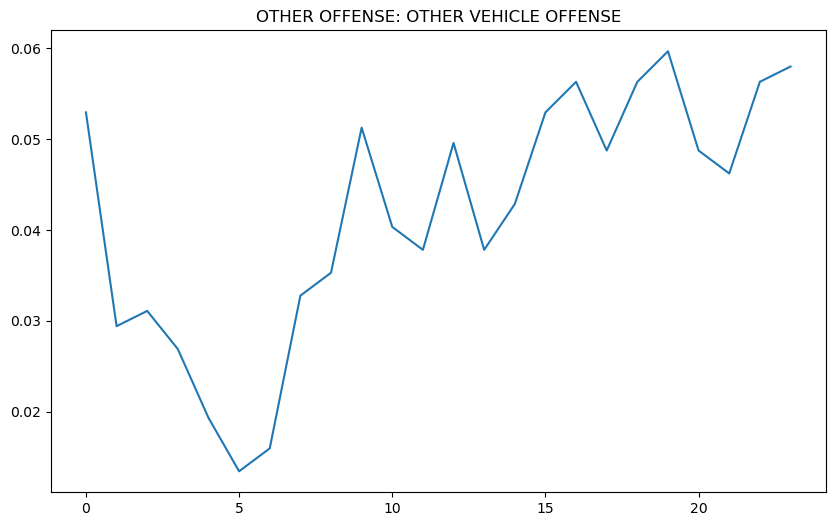

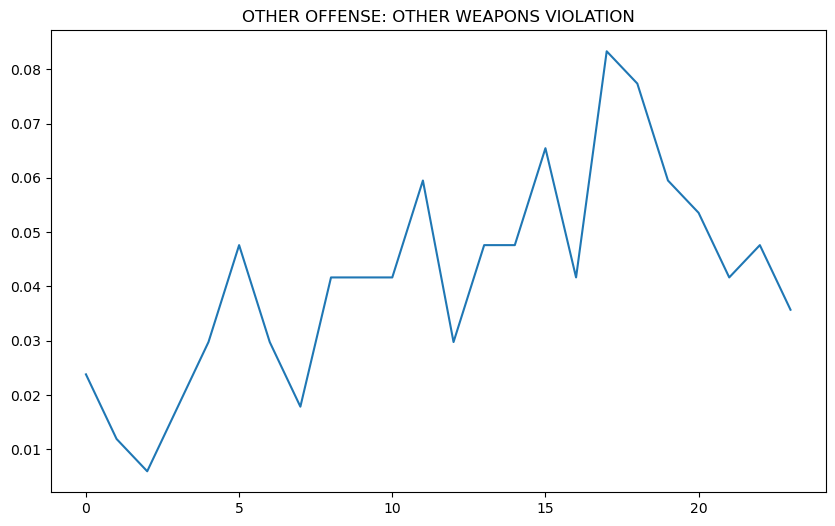

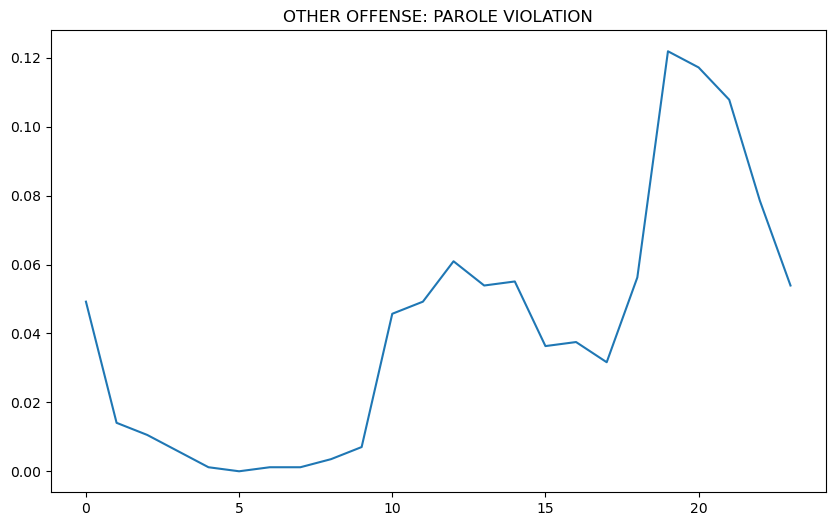

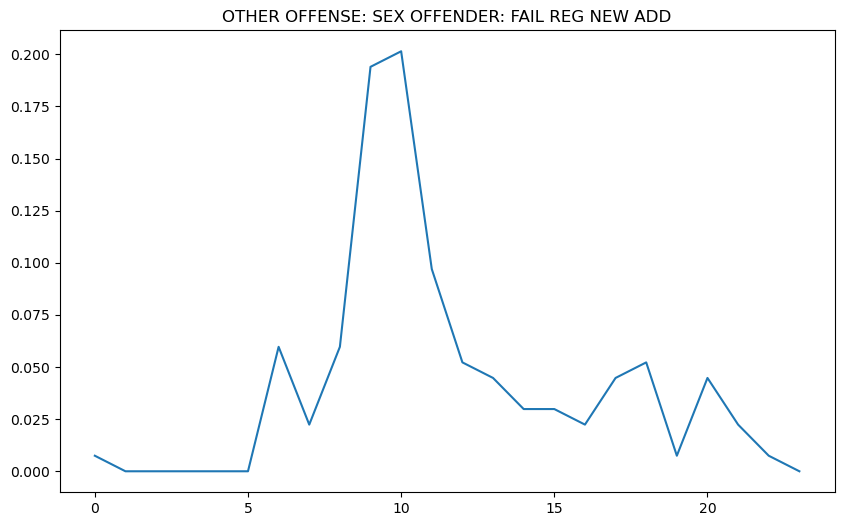

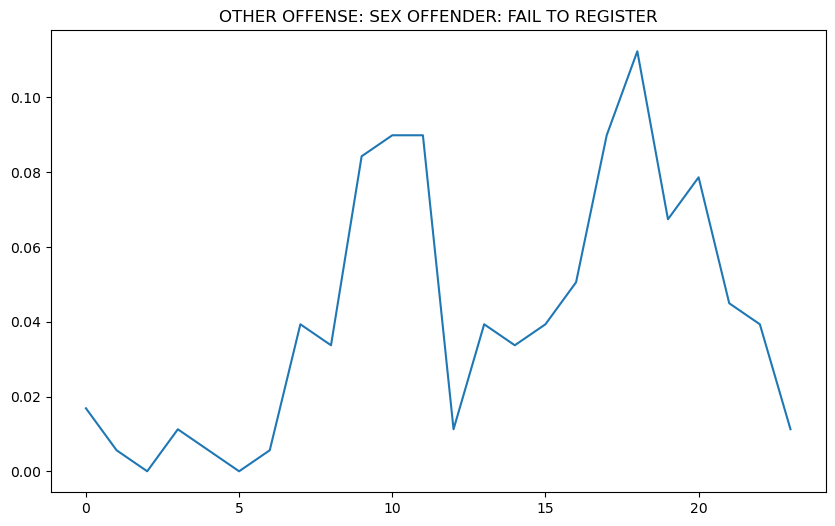

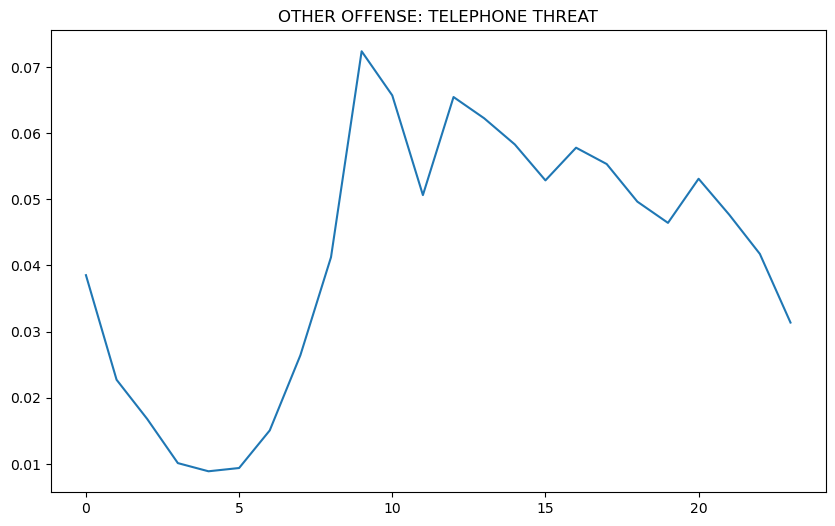

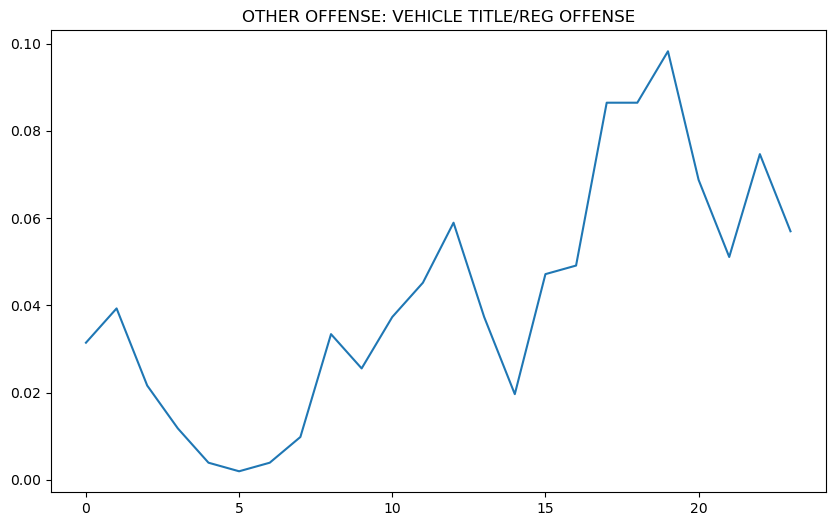

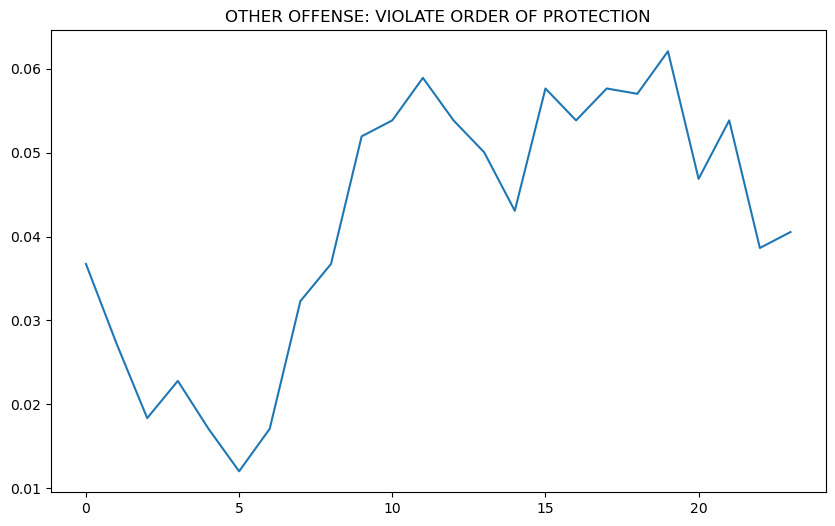

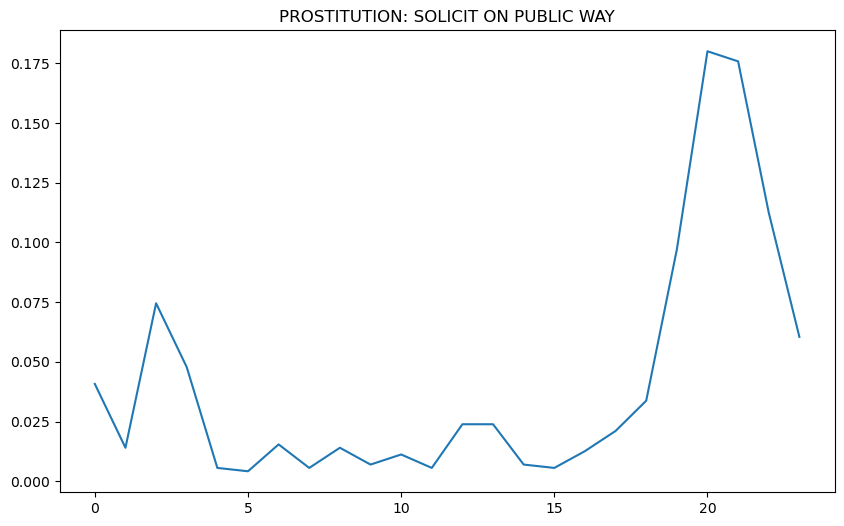

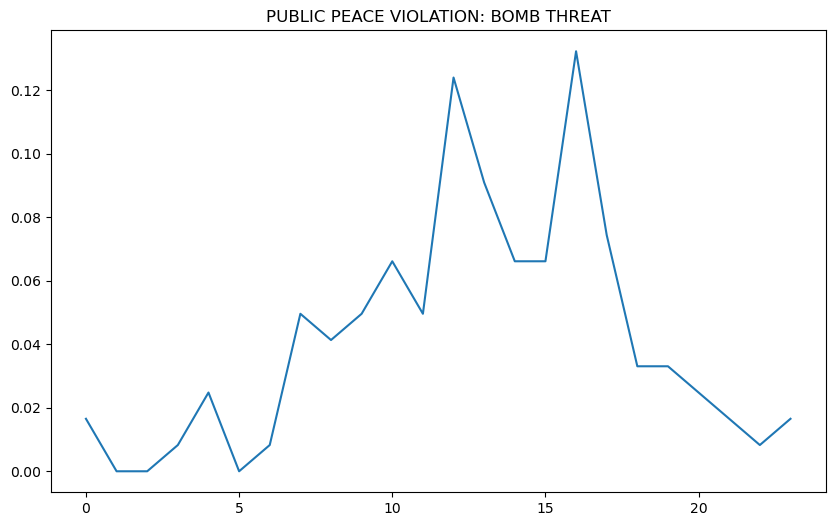

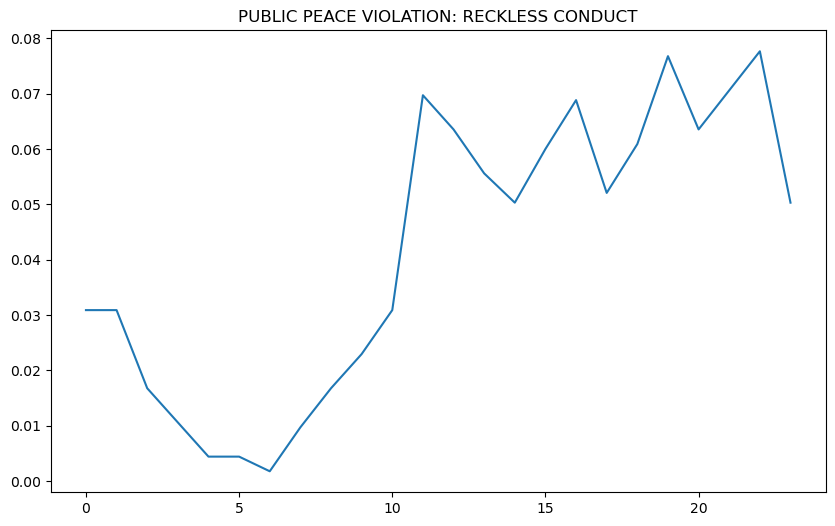

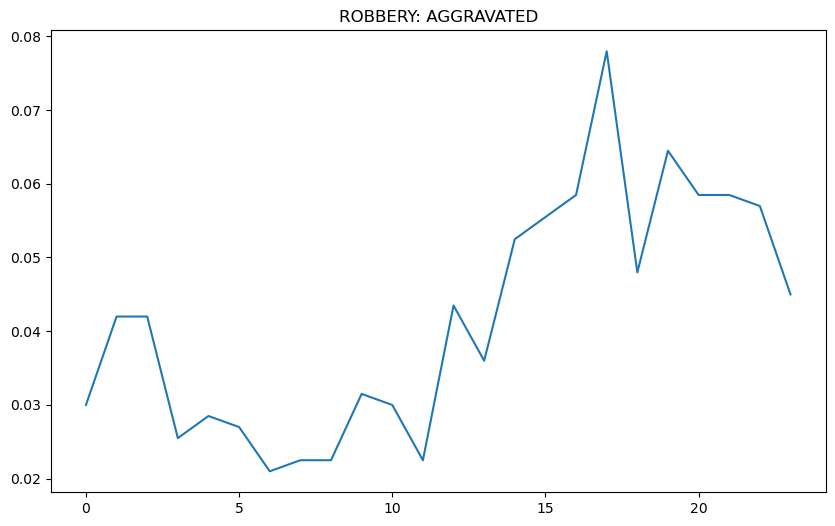

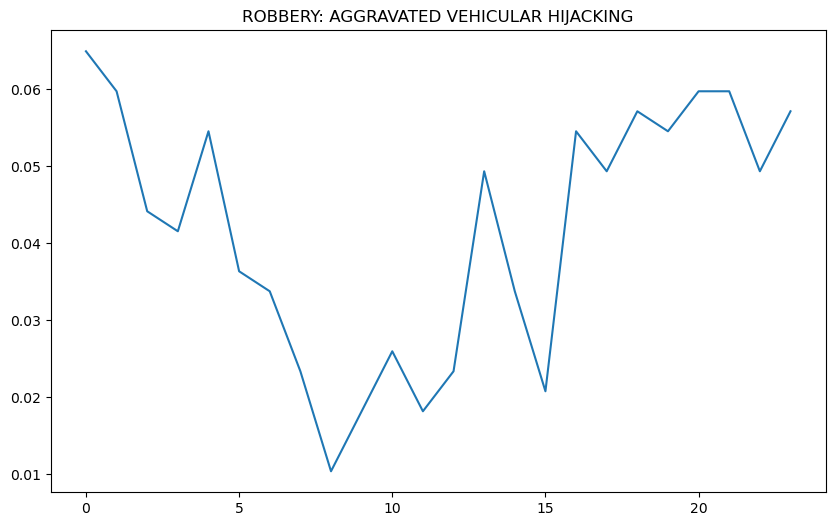

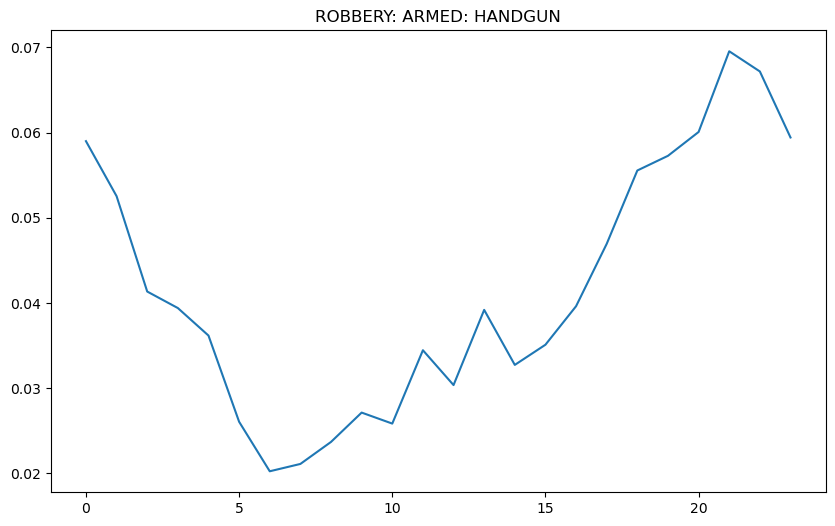

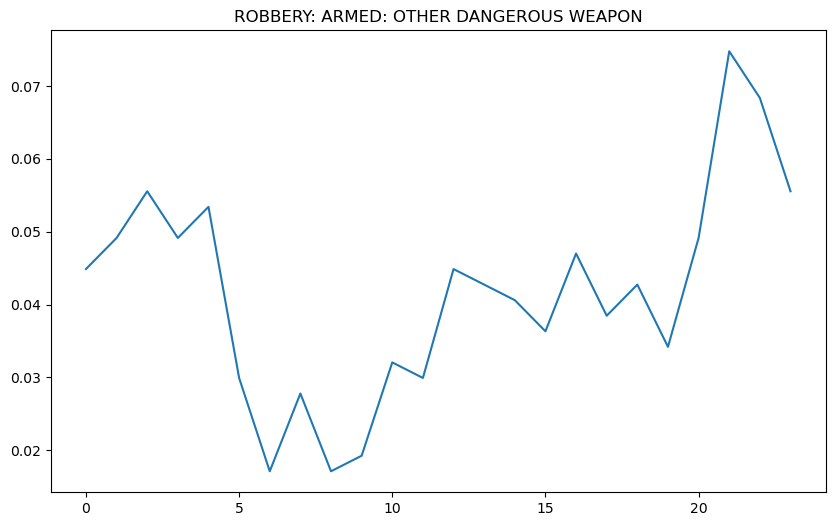

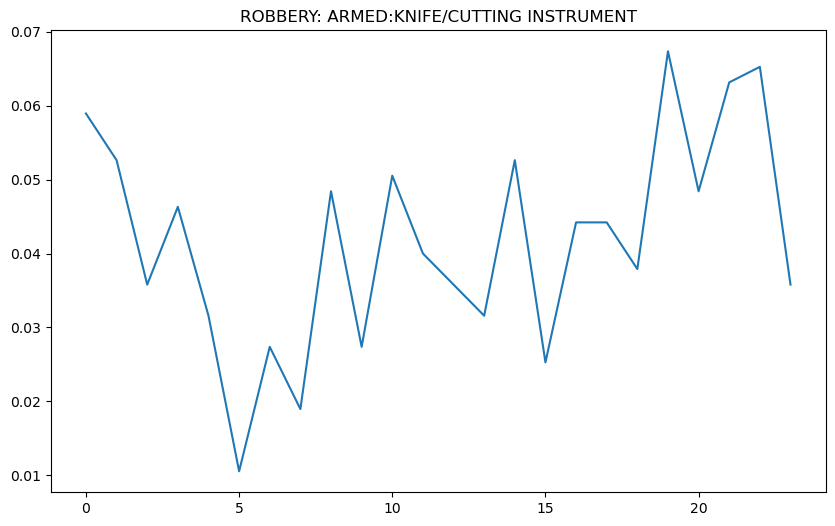

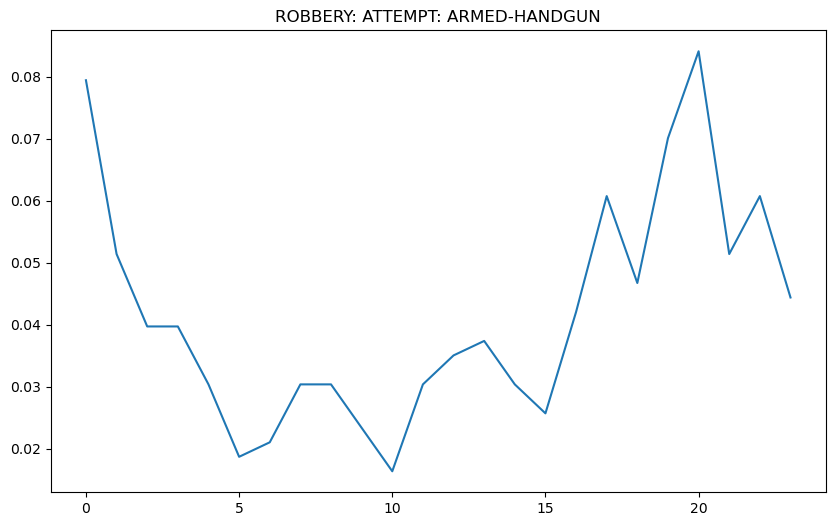

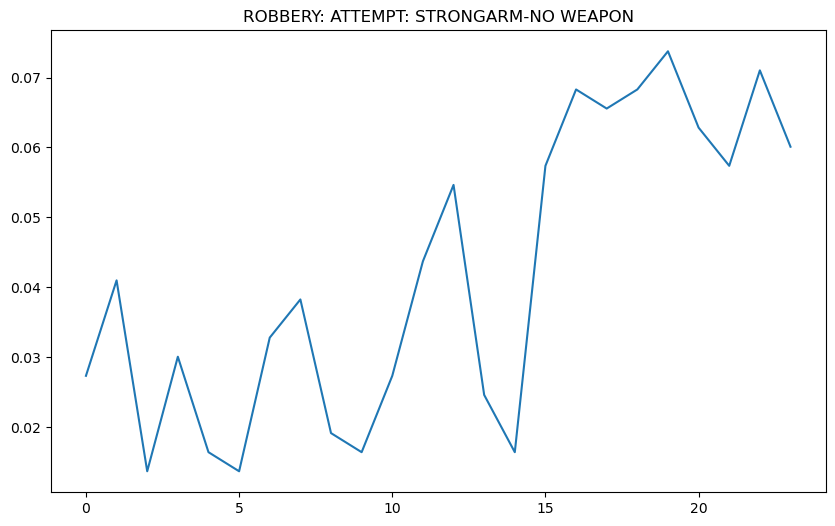

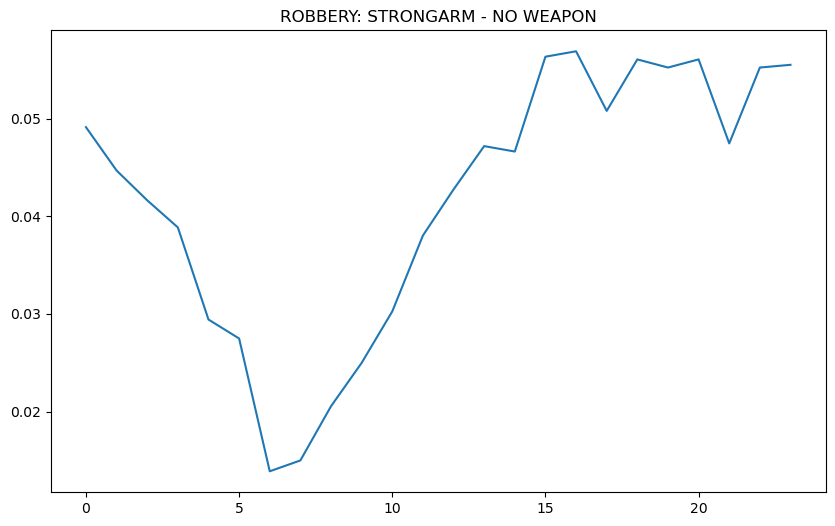

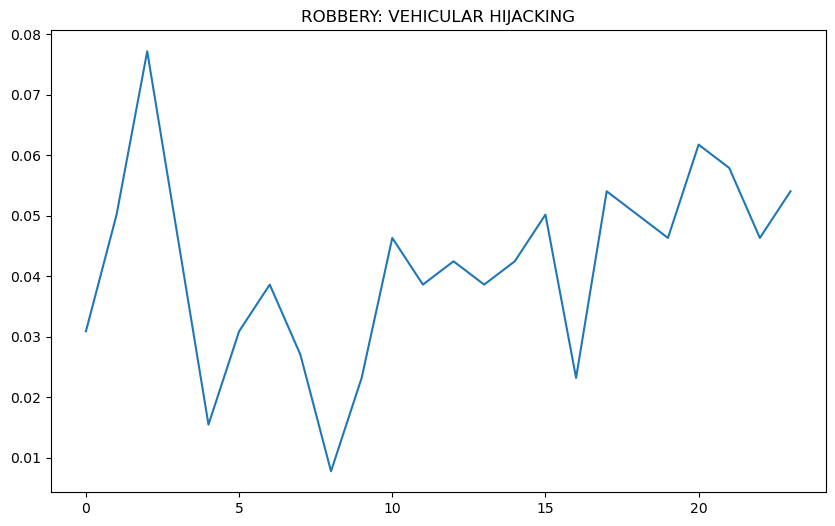

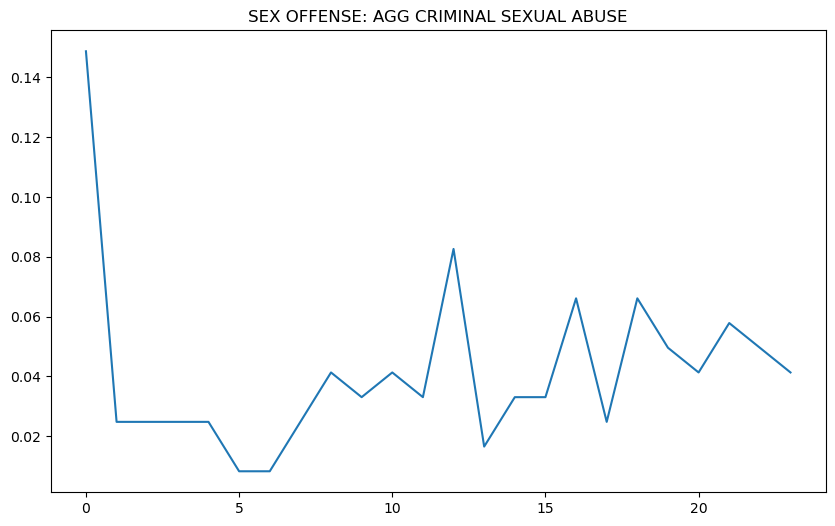

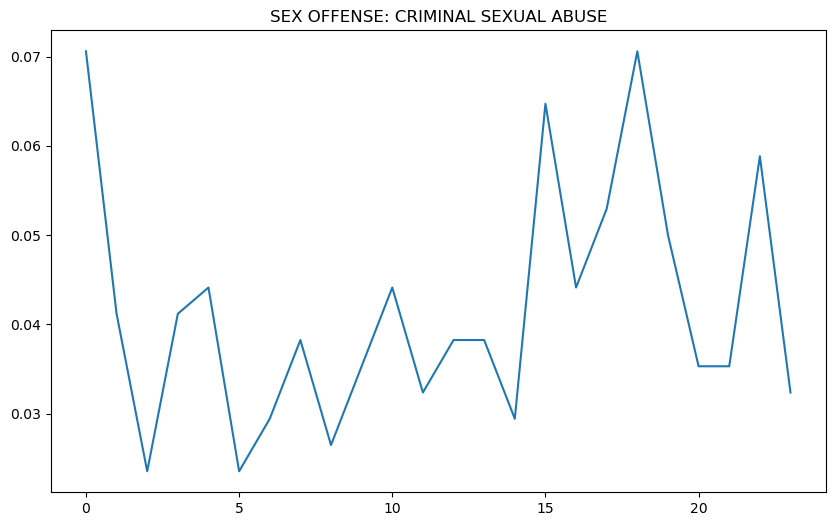

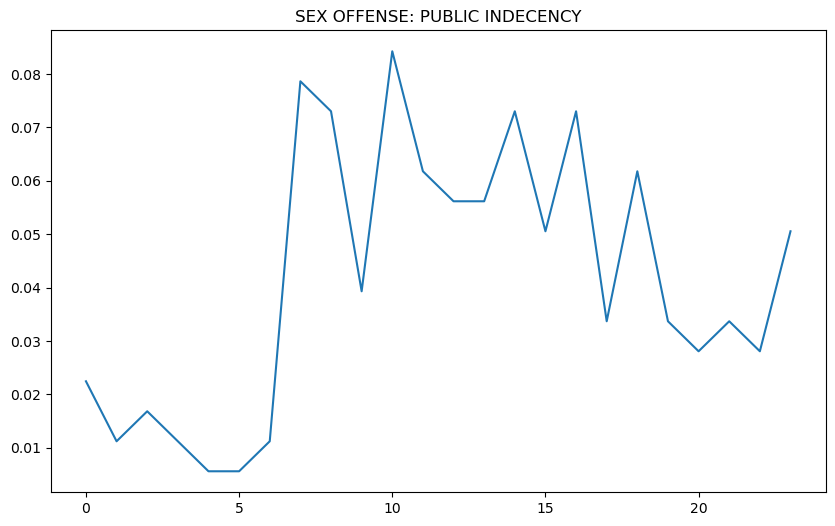

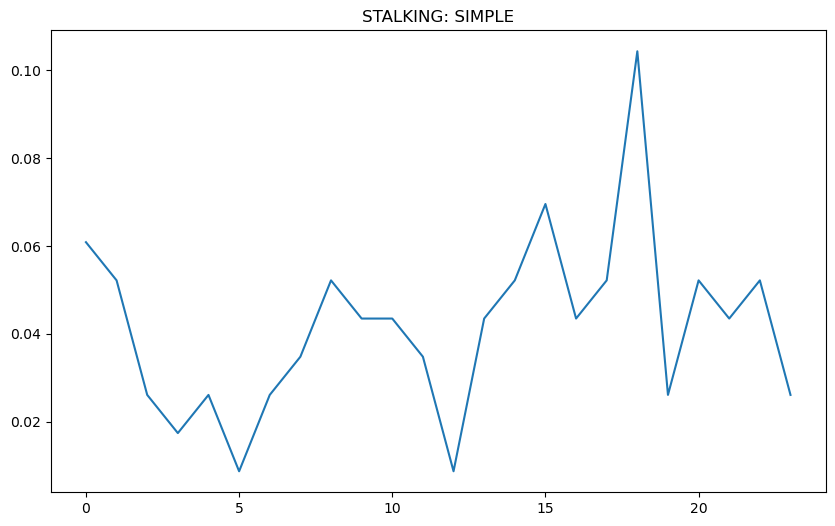

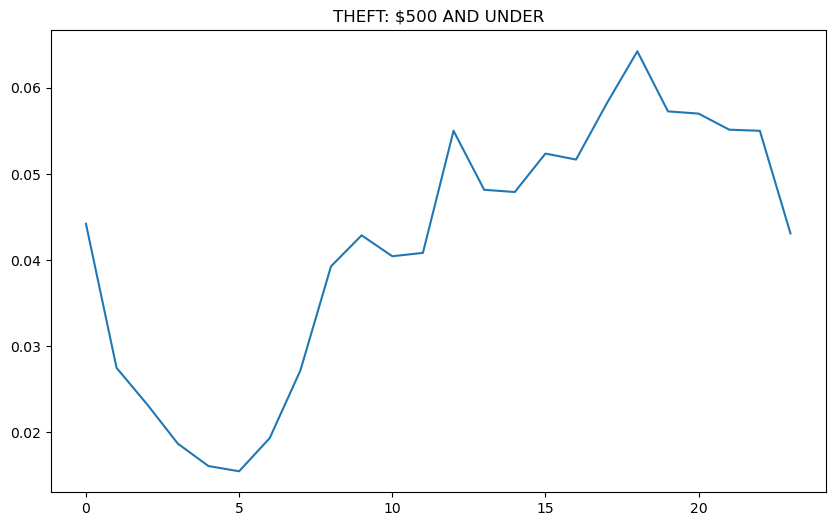

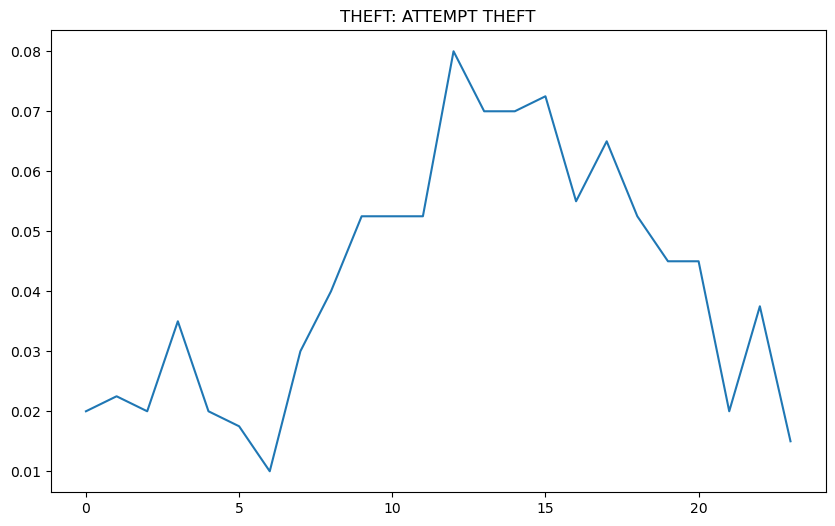

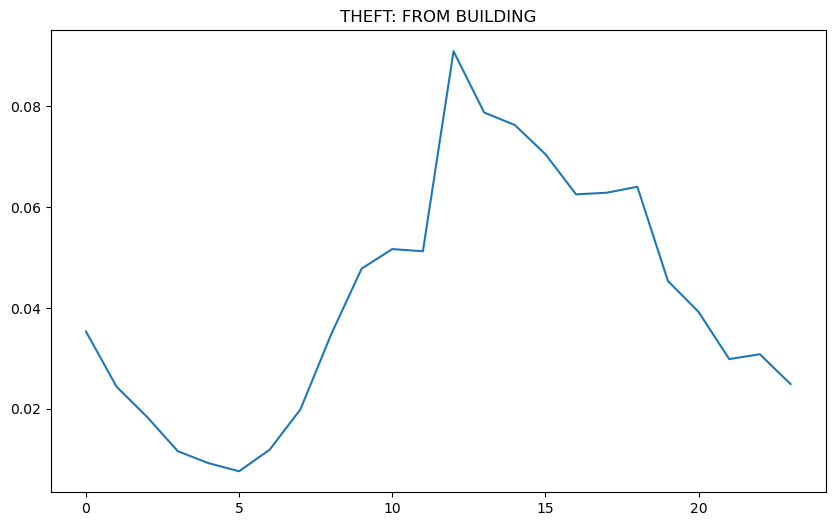

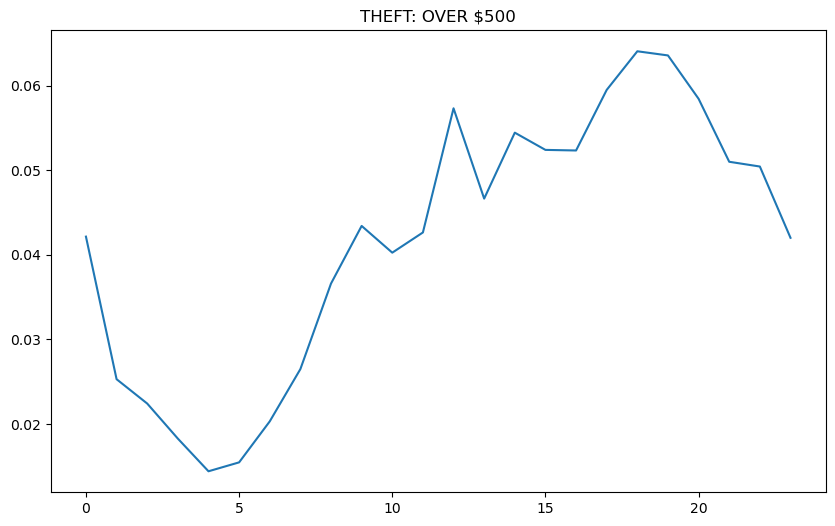

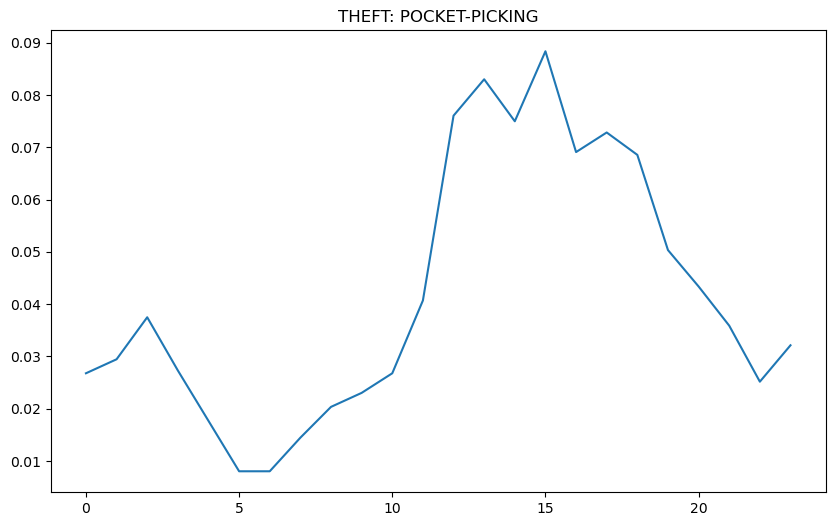

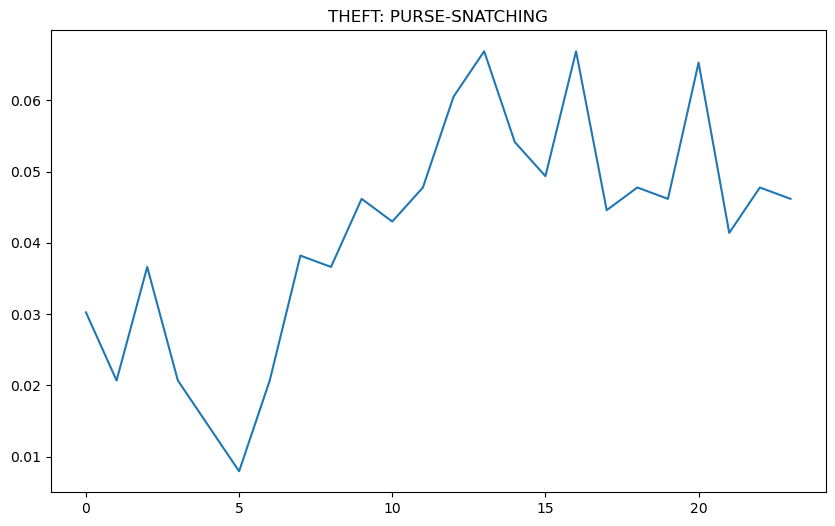

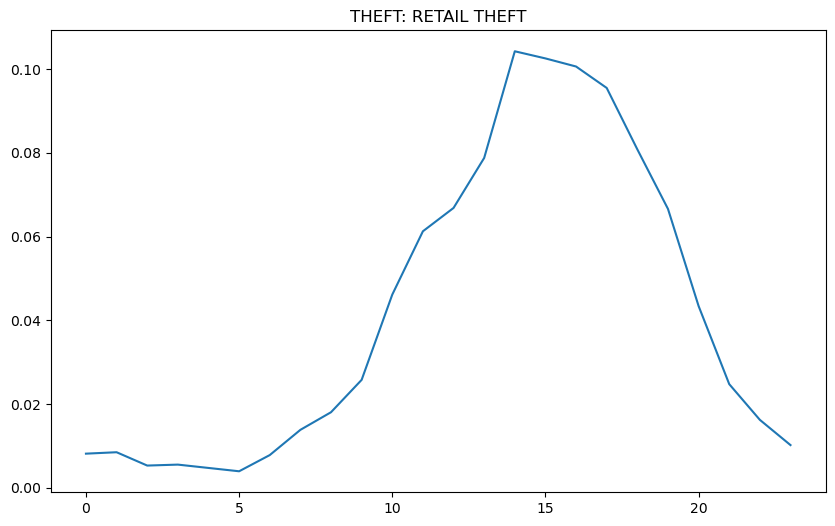

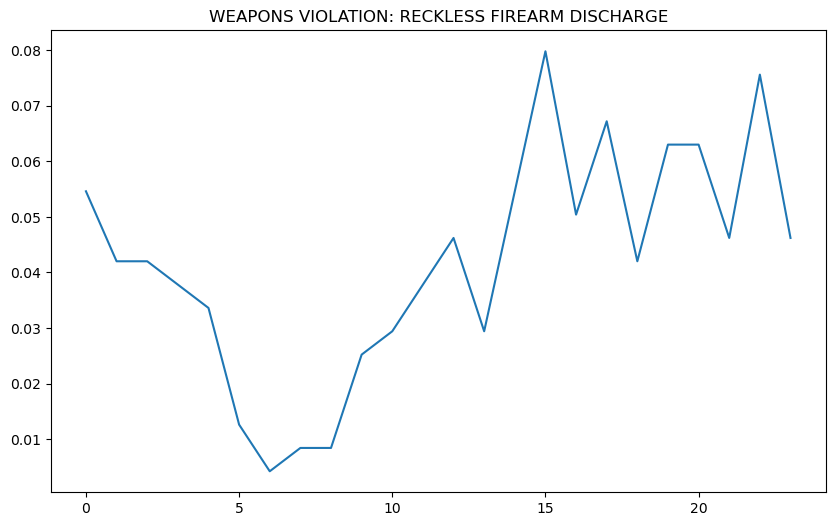

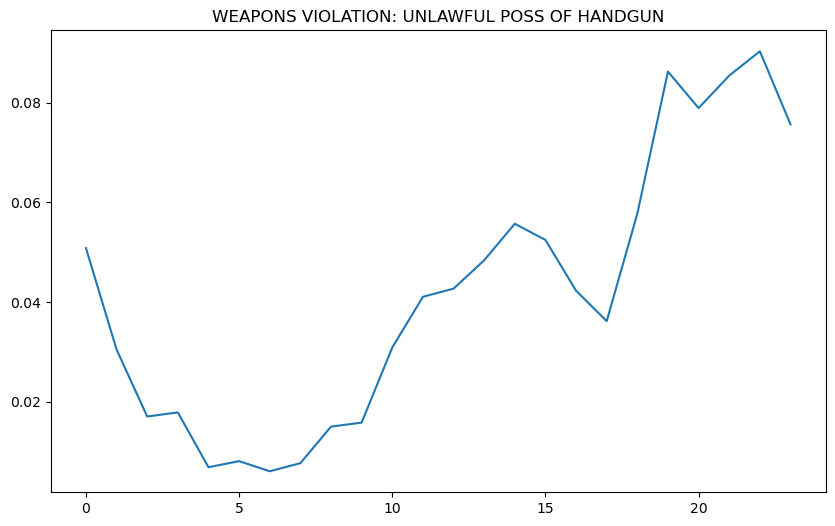

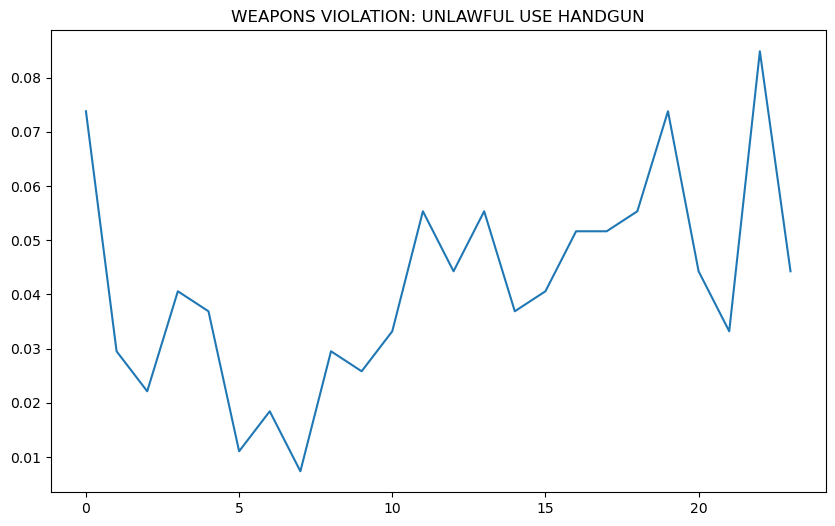

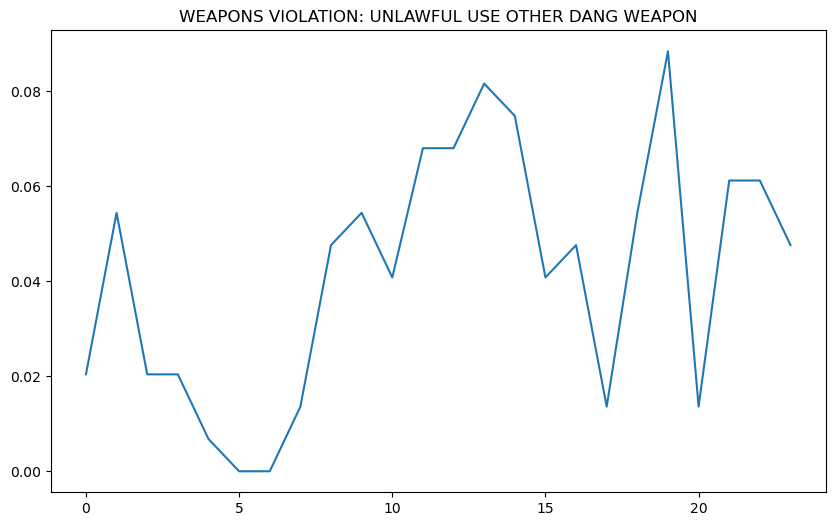

In [16]:
#c)
hour_crime = data3.iloc[:,np.r_[0,9:33]]

for i in hour_crime.index:
    plt.figure(figsize=(10, 6))
    plt.plot(list(range(24)),hour_crime.loc[i][1:25])
    plt.title(hour_crime.loc[i][0])
    plt.show


In [17]:
print('For cluster 0: BATTERY: Domestic battery simple, CRIMINAL DAMAGE: To property.\nFor cluster 1: ROBBERY: Armed: Handgun, MOTOR VEHICLE THEFT: Automobile \nFor cluster 2: DECEPTIVE PRACTICE: Counterfeiting document, GAMBLING: Game/Dice')

For cluster 0: BATTERY: Domestic battery simple, CRIMINAL DAMAGE: To property.
For cluster 1: ROBBERY: Armed: Handgun, MOTOR VEHICLE THEFT: Automobile 
For cluster 2: DECEPTIVE PRACTICE: Counterfeiting document, GAMBLING: Game/Dice


In [18]:
#d)
cluster_means_DOW = cluster_means.iloc[:,0:7]
cluster_means_DOW

day_Sun   day_Mon   day_Tue   day_Wed   day_Thu   day_Fri   day_Sat
cluster                                                                      
0        0.147887  0.136716  0.138297  0.135330  0.136319  0.150045  0.155406
1        0.112275  0.150017  0.152774  0.150143  0.152316  0.157026  0.125448
2        0.118859  0.148893  0.155230  0.147677  0.145194  0.155767  0.128381

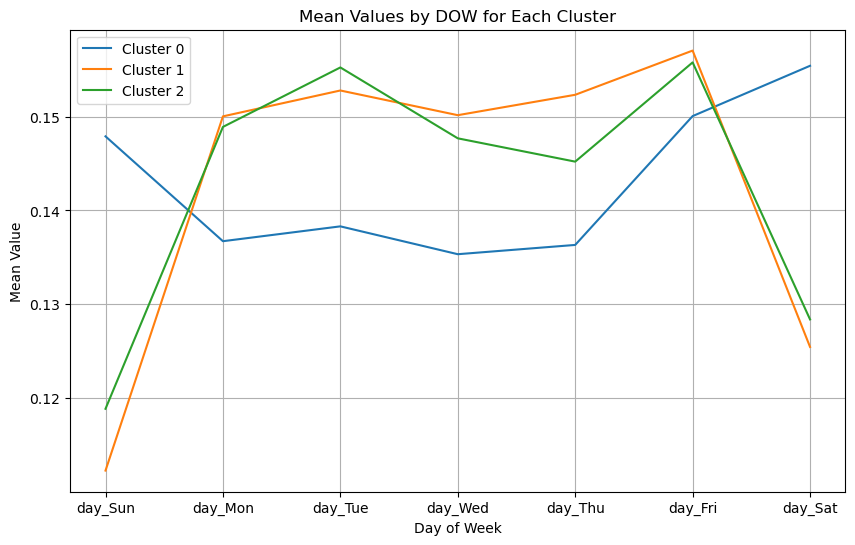

In [19]:
plt.figure(figsize=(10, 6))
for i in cluster_means_hour.index:
    plt.plot(cluster_means_DOW.loc[i], label=f'Cluster {i}')

plt.xlabel('Day of Week')
plt.ylabel('Mean Value')
plt.title('Mean Values by DOW for Each Cluster')
plt.xticks(range(7))
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print('For cluster 0: The trend of it is the most stable among the three trends, generally this cluster of crime types is common whole day of week especially in the weekend but less in the weekdays.')
print('For cluster 1 and cluster 2: The trends of them respresent those crime types which mainly occur during the weekdays，rarely occur in weekends.')

For cluster 0: The trend of it is the most stable among the three trends, generally this cluster of crime types is common whole day of week especially in the weekend but less in the weekdays.
For cluster 1 and cluster 2: The trends of them respresent those crime types which mainly occur during the weekdays，rarely occur in weekends.


In [21]:
#e)
CA_Hour_data = data3.iloc[:,33:111]
CA_Hour_data

community_area_1  community_area_2  community_area_3  community_area_4  \
0            0.005666          0.008499          0.002833          0.000000   
1            0.014815          0.011111          0.014815          0.003704   
2            0.009107          0.009457          0.006655          0.003152   
3            0.014000          0.011000          0.014000          0.003000   
4            0.000000          0.009804          0.000000          0.009804   
..                ...               ...               ...               ...   
114          0.016028          0.008298          0.017961          0.006479   
115          0.025210          0.012605          0.025210          0.004202   
116          0.005287          0.007320          0.002847          0.001220   
117          0.036900          0.029520          0.033210          0.029520   
118          0.006803          0.000000          0.006803          0.013605   

     community_area_5  community_area_6  community_area_7  community_area_8  \
0            0.000000          0.005666          0.011331          0.002833   
1            0.003704          0.018519          0.003704          0.011111   
2            0.002102          0.003152          0.001751          0.010158   
3            0.006000          0.012000          0.004000          0.021000   
4            0.009804          0.019608          0.000000          0.000000   
..                ...               ...               ...               ...   
114          0.007162          0.035012          0.020234          0.120382   
115          0.004202          0.012605          0.004202          0.029412   
116          0.000407          0.002440          0.001627          0.010573   
117          0.003690          0.003690          0.000000          0.003690   
118          0.000000          0.061224          0.000000          0.000000   

     community_area_9  community_area_10  ...  community_area_69  \
0            0.000000           0.000000  ...           0.016997   
1            0.000000           0.007407  ...           0.048148   
2            0.000000           0.002102  ...           0.031524   
3            0.001000           0.002000  ...           0.030000   
4            0.000000           0.009804  ...           0.019608   
..                ...                ...  ...                ...   
114          0.000227           0.002501  ...           0.016824   
115          0.000000           0.000000  ...           0.016807   
116          0.000000           0.000000  ...           0.034160   
117          0.000000           0.000000  ...           0.025830   
118          0.000000           0.000000  ...           0.020408   

     community_area_70  community_area_71  community_area_72  \
0             0.019830           0.022663           0.005666   
1             0.018519           0.025926           0.003704   
2             0.013310           0.042732           0.002102   
3             0.014000           0.037000           0.003000   
4             0.009804           0.019608           0.000000   
..                 ...                ...                ...   
114           0.008185           0.018415           0.001591   
115           0.004202           0.012605           0.004202   
116           0.004067           0.044734           0.002033   
117           0.000000           0.033210           0.003690   
118           0.000000           0.034014           0.000000   

     community_area_73  community_area_74  community_area_75  \
0             0.000000           0.002833           0.005666   
1             0.003704           0.003704           0.011111   
2             0.017863           0.000000           0.012259   
3             0.010000           0.002000           0.002000   
4             0.000000           0.000000           0.009804   
..                 ...                ...                ...   
114           0.007389           0.002160           0.008980   
115      

In [22]:
cluster_CA_Hour_data = CA_Hour_data.groupby('cluster').sum()
cluster_CA_Hour_data

community_area_1  community_area_2  community_area_3  \
cluster                                                         
0                0.884551          0.809030          0.831137   
1                0.466013          0.432770          0.529511   
2                0.198404          0.152972          0.199132   

         community_area_4  community_area_5  community_area_6  \
cluster                                                         
0                0.442123          0.263988          1.194720   
1                0.325861          0.220726          0.836995   
2                0.081371          0.029669          0.237499   

         community_area_7  community_area_8  community_area_9  \
cluster                                                         
0                0.637996          1.579564          0.044606   
1                0.542471          1.745054          0.060979   
2                0.055060          0.371800          0.009222   

         community_area_10  ...  community_area_68  community_area_69  \
cluster                     ...                                         
0                 0.215602  ...           1.621404           1.725193   
1                 0.234952  ...           0.577207           0.722214   
2                 0.033131  ...           0.968848           0.738202   

         community_area_70  community_area_71  community_area_72  \
cluster                                                            
0                 0.609010           1.775693           0.183777   
1                 0.302145           0.785817           0.150759   
2                 0.063926           0.833026           0.025584   

         community_area_73  community_area_74  community_area_75  \
cluster                                                            
0                 0.673979           0.103374           0.433420   
1                 0.367766           0.121567           0.296320   
2                 0.273512           0.014498           0.180741   

         community_area_76  community_area_77  
cluster                                        
0                 0.473264           0.437245  
1                 0.486678           0.396406  
2                 0.022980           0.051972  

[3 rows x 77 columns]

In [23]:
Sum = cluster_CA_Hour_data.sum()
Proption = cluster_CA_Hour_data / Sum
Proption

community_area_1  community_area_2  community_area_3  \
cluster                                                         
0                0.571058          0.580044          0.532855   
1                0.300854          0.310280          0.339478   
2                0.128088          0.109675          0.127667   

         community_area_4  community_area_5  community_area_6  \
cluster                                                         
0                0.520540          0.513213          0.526490   
1                0.383657          0.429108          0.368848   
2                0.095803          0.057679          0.104661   

         community_area_7  community_area_8  community_area_9  \
cluster                                                         
0                0.516376          0.427323          0.388529   
1                0.439060          0.472093          0.531142   
2                0.044564          0.100584          0.080329   

         community_area_10  ...  community_area_68  community_area_69  \
cluster                     ...                                         
0                 0.445748  ...           0.511894           0.541558   
1                 0.485754  ...           0.182230           0.226711   
2                 0.068498  ...           0.305876           0.231730   

         community_area_70  community_area_71  community_area_72  \
cluster                                                            
0                 0.624574           0.523103           0.510321   
1                 0.309867           0.231495           0.418635   
2                 0.065559           0.245402           0.071044   

         community_area_73  community_area_74  community_area_75  \
cluster                                                            
0                 0.512431           0.431734           0.476034   
1                 0.279615           0.507718           0.325455   
2                 0.207953           0.060549           0.198511   

         community_area_76  community_area_77  
cluster                                        
0                 0.481487           0.493714  
1                 0.495134           0.447601  
2                 0.023379           0.058684  

[3 rows x 77 columns]

C:\Users\14367\AppData\Local\Temp\ipykernel_21208\2703487645.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Paired', NUM_COLORS)


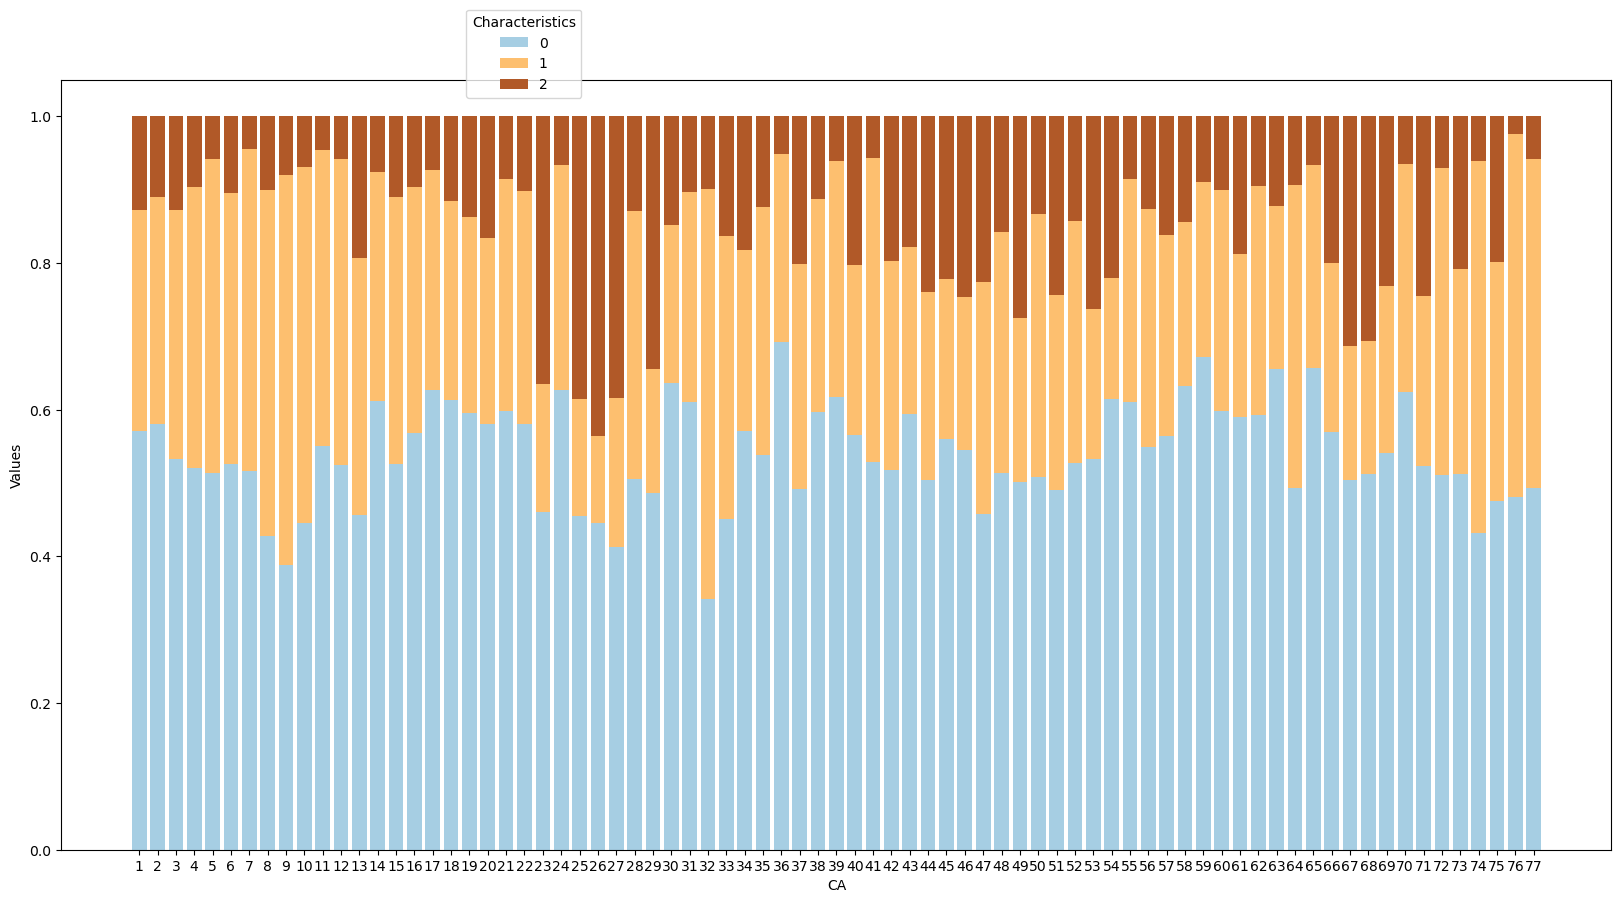

In [24]:
fig, ax = plt.subplots(figsize = (20,10))

NUM_COLORS = 3
cm = plt.cm.get_cmap('Paired', NUM_COLORS)

ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
bot = np.zeros(77)
for c in Proption.index:
    values = Proption.iloc[c,:].values
    ax.bar(list(range(1,78)), values, bottom = bot, label=str(c))
    bot = bot + values
ax.set_xticks(list(range(1,78)))
ax.set_xlabel('CA')
ax.set_ylabel('Values')
ax.legend(title='Characteristics',bbox_to_anchor=(0.34, 1.1),loc='best')
plt.show()

In [25]:
ProptionT = Proption.transpose()
ProptionT.sort_values(by=[0])

cluster                   0         1         2
community_area_32  0.341623  0.559237  0.099140
community_area_9   0.388529  0.531142  0.080329
community_area_27  0.413033  0.202853  0.384114
community_area_8   0.427323  0.472093  0.100584
community_area_74  0.431734  0.507718  0.060549
...                     ...       ...       ...
community_area_30  0.636388  0.214906  0.148706
community_area_63  0.655741  0.222481  0.121778
community_area_65  0.657525  0.276296  0.066179
community_area_59  0.671542  0.238610  0.089848
community_area_36  0.692660  0.256523  0.050818

[77 rows x 3 columns]

In [26]:
ProptionT.sort_values(by=[1])

cluster                   0         1         2
community_area_26  0.444983  0.119225  0.435793
community_area_25  0.454744  0.159417  0.385839
community_area_54  0.614501  0.165295  0.220204
community_area_29  0.485911  0.169104  0.344985
community_area_23  0.460402  0.175216  0.364382
...                     ...       ...       ...
community_area_10  0.445748  0.485754  0.068498
community_area_76  0.481487  0.495134  0.023379
community_area_74  0.431734  0.507718  0.060549
community_area_9   0.388529  0.531142  0.080329
community_area_32  0.341623  0.559237  0.099140

[77 rows x 3 columns]

In [27]:
ProptionT.sort_values(by=[2])

cluster                   0         1         2
community_area_76  0.481487  0.495134  0.023379
community_area_7   0.516376  0.439060  0.044564
community_area_11  0.549860  0.404386  0.045754
community_area_36  0.692660  0.256523  0.050818
community_area_41  0.528954  0.414345  0.056700
...                     ...       ...       ...
community_area_29  0.485911  0.169104  0.344985
community_area_23  0.460402  0.175216  0.364382
community_area_27  0.413033  0.202853  0.384114
community_area_25  0.454744  0.159417  0.385839
community_area_26  0.444983  0.119225  0.435793

[77 rows x 3 columns]

In [28]:
print('we can get some community areas with disproportionate amounts of a given cluster, such as 32, 36, 26, 76,etc.')

we can get some community areas with disproportionate amounts of a given cluster, such as 32, 36, 26, 76,etc.


In [29]:
mean_data4 = data4.iloc[:,4:].mean()
mean_data4

PERCENT OF HOUSING CROWDED                          4.923377
PERCENT HOUSEHOLDS BELOW POVERTY                   21.766234
PERCENT AGED 16+ UNEMPLOYED                        15.372727
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA       20.341558
PERCENT AGED UNDER 18 OR OVER 64                   35.746753
PER CAPITA INCOME                               25563.168831
PERCENT OF HOUSING UNITS VACANT                    12.442935
NUM_CRIMES_2016                                  3262.246753
dtype: float64

In [30]:
data4[data4['Community Area Number']==32]
#There are high PERCENT OF HOUSING UNITS VACANT and Crime Nums.

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
31                     32                Loop  1176373.765  1899831.267   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
31                         1.5                              14.7   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
31                          5.7                                           3.1   

    PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
31                              13.5               65526   

    PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
31                         24.62908             8471

In [31]:
data4[data4['Community Area Number']==36]
#There are high PERCENT HOUSEHOLDS BELOW POVERTY, PERCENT AGED 16+ UNEMPLOYED, PERCENT AGED UNDER 18 OR OVER 64 and low PER CAPITA INCOME.

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
35                     36             Oakland  1182513.802  1879411.798   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
35                         1.3                              39.7   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
35                         28.7                                          18.4   

    PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
35                              40.4               19252   

    PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
35                         12.97479              643

In [32]:
data4[data4['Community Area Number']==26]
#There are high ratio and nums of all those and with low PER CAPITA INCOME. 

Community Area Number COMMUNITY AREA NAME   centroid_x   centroid_y  \
25                     26  West Garfield Park  1148754.852  1898785.758   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
25                         9.4                              41.7   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
25                         25.8                                          24.5   

    PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
25                              43.6               10934   

    PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
25                        27.504936             5340

In [33]:
data4[data4['Community Area Number']==76]
#This Community Area quite normal.

Community Area Number COMMUNITY AREA NAME  centroid_x   centroid_y  \
75                     76              O`Hare  1106851.17  1934484.285   

    PERCENT OF HOUSING CROWDED  PERCENT HOUSEHOLDS BELOW POVERTY  \
75                         3.6                              15.4   

    PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
75                          7.1                                          10.9   

    PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
75                              30.3               25828   

    PERCENT OF HOUSING UNITS VACANT  NUM_CRIMES_2016  
75                         8.237232             1395

In [34]:
#f)
data3

crime_type Category   day_Sun  \
0                                       ARSON: BY FIRE      P1P  0.138810   
1                  ASSAULT: AGG PO HANDS NO/MIN INJURY       P2  0.151852   
2                         ASSAULT: AGGRAVATED: HANDGUN      P1V  0.149912   
3               ASSAULT: AGGRAVATED: OTHER DANG WEAPON      P1V  0.125000   
4                   ASSAULT: AGGRAVATED: OTHER FIREARM      P1V  0.156863   
..                                                 ...      ...       ...   
114                                THEFT: RETAIL THEFT      P1P  0.119700   
115      WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE       P2  0.180672   
116        WEAPONS VIOLATION: UNLAWFUL POSS OF HANDGUN       P2  0.142334   
117            WEAPONS VIOLATION: UNLAWFUL USE HANDGUN       P2  0.177122   
118  WEAPONS VIOLATION: UNLAWFUL USE OTHER DANG WEAPON       P2  0.129252   

      day_Mon   day_Tue   day_Wed   day_Thu   day_Fri   day_Sat    hour_0  \
0    0.135977  0.155807  0.121813  0.130312  0.147309  0.169972  0.073654   
1    0.118519  0.162963  0.122222  0.129630  0.129630  0.185185  0.055556   
2    0.139405  0.141506  0.131349  0.136953  0.133100  0.167776  0.040630   
3    0.139000  0.148000  0.153000  0.133000  0.142000  0.160000  0.034000   
4    0.107843  0.166667  0.117647  0.147059  0.117647  0.186275  0.009804   
..        ...       ...       ...       ...       ...       ...       ...   
114  0.143231  0.140389  0.144367  0.147209  0.153007  0.152097  0.008185   
115  0.096639  0.147059  0.092437  0.138655  0.142857  0.201681  0.054622   
116  0.133388  0.150468  0.145181  0.125661  0.149654  0.153314  0.050834   
117  0.114391  0.132841  0.143911  0.140221  0.121771  0.169742  0.073801   
118  0.204082  0.108844  0.156463  0.170068  0.149660  0.081633  0.020408   

     ...  community_area_69  community_area_70  community_area_71  \
0    ...           0.016997           0.019830           0.022663   
1    ...           0.048148           0.018519           0.025926   
2    ...           0.031524           0.013310           0.042732   
3    ...           0.030000           0.014000           0.037000   
4    ...           0.019608           0.009804           0.019608   
..   ...                ...                ...                ...   
114  ...           0.016824           0.008185           0.018415   
115  ...           0.016807           0.004202           0.012605   
116  ...           0.034160           0.004067           0.044734   
117  ...           0.025830           0.000000           0.033210   
118  ...           0.020408           0.000000           0.034014   

     community_area_72  community_area_73  community_area_74  \
0             0.005666           0.000000           0.002833   
1             0.003704           0.003704           0.003704   
2             0.002102           0.017863           0.000000   
3             0.003000           0.010000           0.002000   
4             0.000000           0.000000           0.000000   
..                 ...                ...                ...   
114           0.001591           0.007389           0.002160   
115           0.004202           0.000000           0.000000   
116           0.002033           0.016267           0.000000   
117           0.003690           0.007380           0.000000   
118           0.000000           0.006803           0.000000   

     community_area_75  community_area_76  community_area_77  cluster  
0             0.005666           0.000000           0.002833        0  
1             0.011111           0.011111           0.007407        0  
2             0.012259           0.002102           0.003152        0  
3             0.002000           0.003000           0.006000        0  
4             0.009804           0.000000           0.000000        0  
..                 ...                ...                ...      ...  
114           0.008980           0.003069           0.020462        1  
115           0.0042

In [35]:
data3_0 = data3[data3['cluster']==0]
print(len(data3_0))
print('For cluster 0, the number of P1P is',len(data3_0[data3_0['Category']=='P1P']))
print('For cluster 0, the number of P1V is',len(data3_0[data3_0['Category']=='P1V']))
print('For cluster 0, the number of P2 is',len(data3_0[data3_0['Category']=='P2']))

62
For cluster 0, the number of P1P is 10
For cluster 0, the number of P1V is 24
For cluster 0, the number of P2 is 28


In [36]:
data3_1 = data3[data3['cluster']==1]
print(len(data3_1))
print('For cluster 1, the number of P1P is',len(data3_1[data3_1['Category']=='P1P']))
print('For cluster 1, the number of P1V is',len(data3_1[data3_1['Category']=='P1V']))
print('For cluster 1, the number of P2 is',len(data3_1[data3_1['Category']=='P2']))

32
For cluster 1, the number of P1P is 5
For cluster 1, the number of P1V is 0
For cluster 1, the number of P2 is 27


In [37]:
data3_2 = data3[data3['cluster']==2]
print(len(data3_2))
print('For cluster 2, the number of P1P is',len(data3_2[data3_2['Category']=='P1P']))
print('For cluster 2, the number of P1V is',len(data3_2[data3_2['Category']=='P1V']))
print('For cluster 2, the number of P2 is',len(data3_2[data3_2['Category']=='P2']))

25
For cluster 2, the number of P1P is 0
For cluster 2, the number of P1V is 0
For cluster 2, the number of P2 is 25


In [38]:
print('Three groups formed by clustering of hour-of-day trends do not closely match the FBI\'s division between P1V, P1P, and P2 crimes')

Three groups formed by clustering of hour-of-day trends do not closely match the FBI's division between P1V, P1P, and P2 crimes


In [39]:
#g)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [40]:
day_data = data3.loc[:, 'day_Sun':'day_Sat']
day_data

day_Sun   day_Mon   day_Tue   day_Wed   day_Thu   day_Fri   day_Sat
0    0.138810  0.135977  0.155807  0.121813  0.130312  0.147309  0.169972
1    0.151852  0.118519  0.162963  0.122222  0.129630  0.129630  0.185185
2    0.149912  0.139405  0.141506  0.131349  0.136953  0.133100  0.167776
3    0.125000  0.139000  0.148000  0.153000  0.133000  0.142000  0.160000
4    0.156863  0.107843  0.166667  0.117647  0.147059  0.117647  0.186275
..        ...       ...       ...       ...       ...       ...       ...
114  0.119700  0.143231  0.140389  0.144367  0.147209  0.153007  0.152097
115  0.180672  0.096639  0.147059  0.092437  0.138655  0.142857  0.201681
116  0.142334  0.133388  0.150468  0.145181  0.125661  0.149654  0.153314
117  0.177122  0.114391  0.132841  0.143911  0.140221  0.121771  0.169742
118  0.129252  0.204082  0.108844  0.156463  0.170068  0.149660  0.081633

[119 rows x 7 columns]

In [41]:
for num_clusters1 in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters1, random_state=42)
    cluster_labels1 = kmeans.fit_predict(day_data)
    
    silhouette_avg1 = silhouette_score(day_data, cluster_labels1)

    if silhouette_avg1 > -1:
        best_silhouette_score1 = silhouette_avg1
        best_num_clusters1 = num_clusters1

print("Best number of clusters using silhouette method in k-means:", best_num_clusters1)

C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Best number of clusters using silhouette method in k-means: 9


In [42]:
for num_clusters2 in range(2, 10):
    gmm = GaussianMixture(n_components=num_clusters2, random_state=42)
    cluster_labels2 = gmm.fit_predict(day_data)
    
    silhouette_avg2 = silhouette_score(day_data, cluster_labels2)
    
    if silhouette_avg2 > -1:
        best_silhouette_score2 = silhouette_avg2
        best_num_clusters2 = num_clusters2

print("Best number of clusters using silhouette method in Gaussian mixture model:", best_num_clusters2)

C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Best number of clusters using silhouette method in Gaussian mixture model: 9


In [43]:
for num_clusters3 in range(2, 10):
    hierarchical_single = AgglomerativeClustering(n_clusters=num_clusters3, linkage='single')
    cluster_labels3 = hierarchical_single.fit_predict(day_data)
    
    silhouette_avg3 = silhouette_score(day_data, cluster_labels3)
    
    if silhouette_avg3 > -1:
        best_silhouette_score3 = silhouette_avg3
        best_num_clusters3 = num_clusters3

print("Best number of clusters using silhouette method in hierarchical clustering model with single link:", best_num_clusters3)

Best number of clusters using silhouette method in hierarchical clustering model with single link: 9


In [44]:
for num_clusters4 in range(2, 10):
    hierarchical_complete = AgglomerativeClustering(n_clusters=num_clusters4, linkage='complete')
    cluster_labels4 = hierarchical_complete.fit_predict(day_data)
    
    silhouette_avg4 = silhouette_score(day_data, cluster_labels4)
    
    if silhouette_avg4 > -1:
        best_silhouette_score4 = silhouette_avg4
        best_num_clusters4 = num_clusters4

print("Best number of clusters using silhouette method in hierarchical clustering model with complete link:", best_num_clusters4)

Best number of clusters using silhouette method in hierarchical clustering model with complete link: 9


In [45]:
kmeans = KMeans(n_clusters=best_num_clusters1, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(day_data)

gmm = GaussianMixture(n_components=best_num_clusters2, random_state=42)
cluster_labels_gmm = gmm.fit_predict(day_data)

hierarchical_single = AgglomerativeClustering(n_clusters=best_num_clusters3, linkage='single')
cluster_labels_single = hierarchical_single.fit_predict(day_data)

hierarchical_complete = AgglomerativeClustering(n_clusters=best_num_clusters4, linkage='complete')
cluster_labels_complete = hierarchical_complete.fit_predict(day_data)


C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\14367\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
num_clusters1 = len(set(cluster_labels_kmeans))
cluster_sizes1 = pd.Series(cluster_labels_kmeans).value_counts()
print("For K-Means:")
print("Number of clusters formed:", num_clusters1)
print("Cluster sizes:\n",cluster_sizes1)
print("Silhouette score:", best_silhouette_score1)

For K-Means:
Number of clusters formed: 9
Cluster sizes:
 8    39
2    35
0    24
4     7
5     6
1     4
6     2
3     1
7     1
dtype: int64
Silhouette score: 0.16680999159613993


In [47]:
num_clusters2 = len(set(cluster_labels_gmm))
cluster_sizes2 = pd.Series(cluster_labels_gmm).value_counts()
print("For GaussianMixture:")
print("Number of clusters formed:", num_clusters2)
print("Cluster sizes:\n", cluster_sizes2)
print("Silhouette score:", best_silhouette_score2)

For GaussianMixture:
Number of clusters formed: 9
Cluster sizes:
 3    31
1    24
5    24
2    18
0    13
6     5
7     2
4     1
8     1
dtype: int64
Silhouette score: 0.06811435694416887


In [48]:
num_clusters3 = len(set(cluster_labels_single))
cluster_sizes3 = pd.Series(cluster_labels_single).value_counts()
print("For hierarchical clustering with single link:")
print("Number of clusters formed:", num_clusters3)
print("Cluster sizes:\n", cluster_sizes3)
print("Silhouette score:", best_silhouette_score3)

For hierarchical clustering with single link:
Number of clusters formed: 9
Cluster sizes:
 1    110
0      2
4      1
7      1
5      1
6      1
8      1
2      1
3      1
dtype: int64
Silhouette score: 0.3254219274892415


In [49]:
num_clusters4 = len(set(cluster_labels_complete))
cluster_sizes4 = pd.Series(cluster_labels_complete).value_counts()
print("For hierarchical clustering with complete link:")
print("Number of clusters formed:", num_clusters4)
print("Cluster sizes:\n", cluster_sizes4)
print("Silhouette score:", best_silhouette_score4)

For hierarchical clustering with complete link:
Number of clusters formed: 9
Cluster sizes:
 1    49
3    39
4    13
7    10
0     4
5     1
6     1
2     1
8     1
dtype: int64
Silhouette score: 0.10066503899164748
